<h1>Iran Economy Analysis</h1>

This notebook dives deep into Iran's Economic analysis. This notebook aims to provide a full macroeconomic story spanning more than six decades, highlighting trends, anomalies, and structural shifts in Iran’s economy.

<h2>Importing libraries and dataset</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/kaggle/input/iran-economic-indicators-1960-2024/data.csv")

<h2>Exploring the dataset</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        65 non-null     int64  
 1   Year                              65 non-null     int64  
 2   GDP_Current_USD                   65 non-null     float64
 3   GDP_Growth_Percent                64 non-null     float64
 4   GDP_Per_Capita_USD                65 non-null     float64
 5   Inflation_Rate_Percent            65 non-null     float64
 6   Official_Exchange_Rate            64 non-null     float64
 7   Population_Total                  65 non-null     int64  
 8   Population_Growth_Percent         64 non-null     float64
 9   Exports_USD                       65 non-null     float64
 10  Imports_USD                       65 non-null     float64
 11  Trade_Percent_GDP                 65 non-null     float64
 12  Industry_V

In [5]:
df.sample(10)

,Unnamed: 0,Year,GDP_Current_USD,GDP_Growth_Percent,GDP_Per_Capita_USD,Inflation_Rate_Percent,Official_Exchange_Rate,Population_Total,Population_Growth_Percent,Exports_USD,Imports_USD,Trade_Percent_GDP,Industry_Value_Added_Percent_GDP
9,9,1969,9.743090e+09,15.516659,344.601687,3.593195,75.750000,28273482,3.001762,1.756492e+09,2.050926e+09,39.078143,38.538983
44,44,2004,1.877546e+11,4.336666,2672.422665,14.761509,8613.989421,70256316,2.139221,4.743981e+10,4.890430e+10,51.313857,47.470472
30,30,1990,1.248133e+11,13.594926,2137.942227,7.627675,68.112373,58380092,2.911407,1.657363e+10,2.970784e+10,37.080568,32.799820
21,21,1981,1.004993e+11,-5.696787,2393.449856,24.203590,78.346845,41989312,5.248535,1.243149e+10,2.808291e+10,40.313106,34.720866
10,10,1970,1.097625e+10,10.927602,376.606879,1.666871,75.750000,29145100,3.036247,2.026823e+09,2.327125e+09,39.667015,40.582584
57,57,2017,5.102399e+11,3.026855,6000.933464,8.044924,33226.298152,85026754,1.438704,1.114003e+11,1.087972e+11,43.155693,36.141393
46,46,2006,2.656022e+11,4.999795,3618.916014,10.015898,9170.942877,73392747,2.154441,7.933281e+10,6.188086e+10,53.167359,48.259901
24,24,1984,1.622767e+11,-7.139850,3395.336976,12.540219,90.051440,47793998,3.761681,1.835908e+10,2.697153e+10,27.934138,34.439818
43,43,2003,1.519112e+11,8.639298,2208.996366,16.468012,8193.887519,68769340,1.108389,3.741189e+10,3.957535e+10,50.679106,45.059950
12,12,1972,1.715346e+10,14.499016,554.748034,6.398241,75.749970,30921179,2.927541,3.936284e+09,3.689022e+09,44.453450,43.394904


In [6]:
for i in df.columns:
    print(i)

Unnamed: 0
Year
GDP_Current_USD
GDP_Growth_Percent
GDP_Per_Capita_USD
Inflation_Rate_Percent
Official_Exchange_Rate
Population_Total
Population_Growth_Percent
Exports_USD
Imports_USD
Trade_Percent_GDP
Industry_Value_Added_Percent_GDP


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.dtypes

Year                                  int64
GDP_Current_USD                     float64
GDP_Growth_Percent                  float64
GDP_Per_Capita_USD                  float64
Inflation_Rate_Percent              float64
Official_Exchange_Rate              float64
Population_Total                      int64
Population_Growth_Percent           float64
Exports_USD                         float64
Imports_USD                         float64
Trade_Percent_GDP                   float64
Industry_Value_Added_Percent_GDP    float64
dtype: object

In [9]:
df.info

<bound method DataFrame.info of     Year  GDP_Current_USD  GDP_Growth_Percent  GDP_Per_Capita_USD  \
0   1960     4.199134e+09                 NaN          195.577527   
1   1961     4.426949e+09           10.390918          200.081529   
2   1962     4.693566e+09            7.909268          205.786810   
3   1963     4.928628e+09            7.042075          209.559376   
4   1964     5.379846e+09            8.475228          221.731728   
..   ...              ...                 ...                 ...   
60  2020     2.809343e+11            4.441809         3202.500035   
61  2021     4.073507e+11            4.130897         4605.148813   
62  2022     4.226623e+11            4.352811         4721.204371   
63  2023     4.575105e+11            5.332351         5049.299316   
64  2024     4.752521e+11            3.663121         5190.169590   

    Inflation_Rate_Percent  Official_Exchange_Rate  Population_Total  \
0                 9.822411                   75.75          2147043

<h2>Exploratory data analysis</h2>

<h3>1. Long term economic growth story (Time series)</h3>

<h4>Plotting graph for GDP overtime</h4>

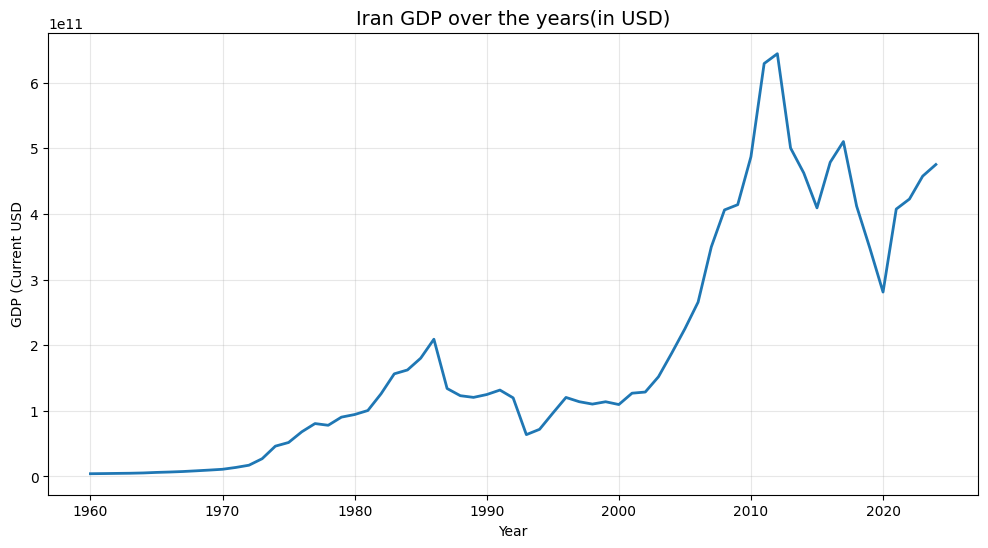

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df['Year'],df['GDP_Current_USD'],linewidth=2)
plt.title("Iran GDP over the years(in USD)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP (Current USD")
plt.grid(alpha=0.3)
plt.show()

we can see that the GDP displayed a sharp growth in around 2011-2013 then again declined in 2020 (maybe due to COVID) and now its on its growth stage again

<h4>Now let us analyze GDP growth rate in Boom VS Recession</h4>

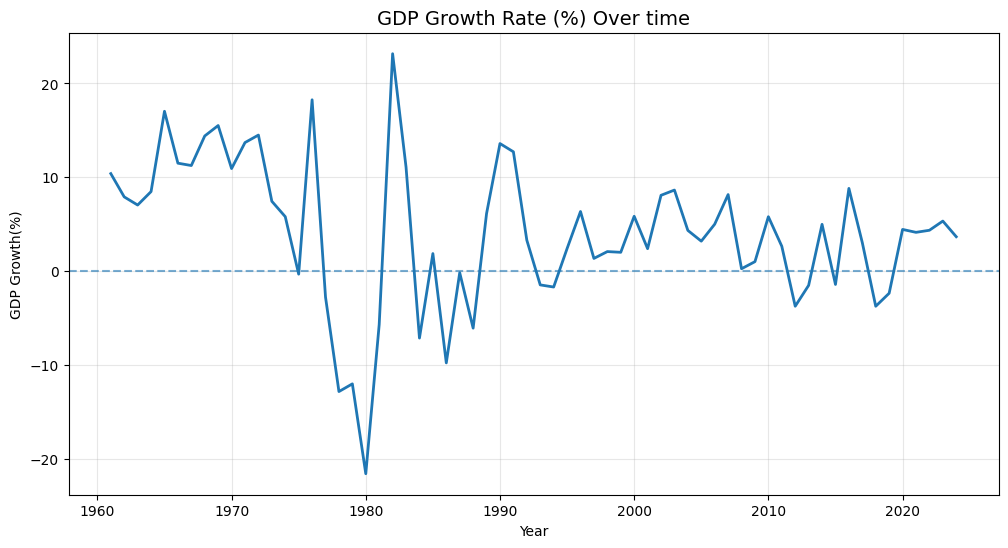

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2)
plt.axhline(0,linestyle="--",alpha=0.6)
plt.title("GDP Growth Rate (%) Over time",fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP Growth(%)")
plt.grid(alpha=0.3)
plt.show()

In the above graph the graph movement below the dotted line shows Recession hence we can see that in 1980's we got a major recession which drove the GDP to -20% and right after that we got a BOOM which boosted the economy GDP by 20+% after that boom the economy's GDP has been fluctuating in stable rate 

<h4>Highlighting economic crisis yearly(which has negative growth)</h4>

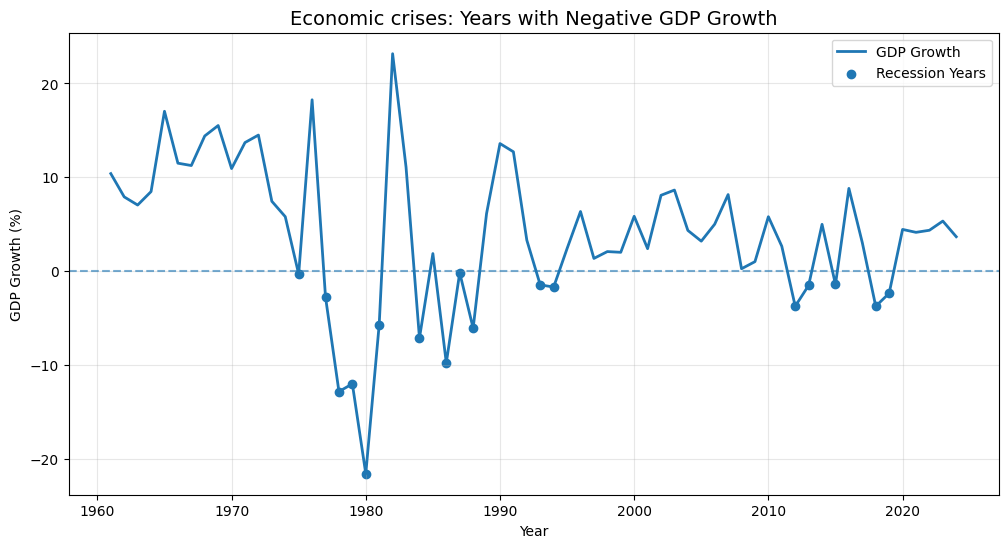

In [12]:
plt.figure(figsize=(12,6))

plt.plot(df["Year"],df["GDP_Growth_Percent"],label= "GDP Growth",linewidth=2)
plt.scatter(
    df[df["GDP_Growth_Percent"]<0]["Year"],
    df[df["GDP_Growth_Percent"]<0]["GDP_Growth_Percent"],
    label="Recession Years"
)

plt.axhline(0,linestyle = "--",alpha=0.6)
plt.title("Economic crises: Years with Negative GDP Growth",fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<h4>Growth Stability vs volatility(With rolling mean)</h4>

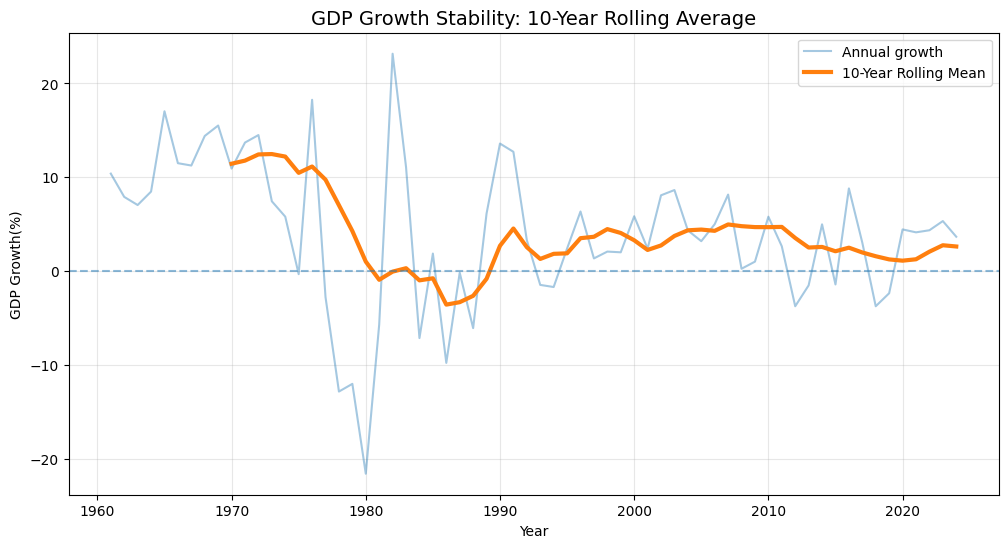

In [13]:
df["GDP_Growth_Rolling_10Y"]= df["GDP_Growth_Percent"].rolling(window=10).mean()

plt.figure(figsize=(12,6))
plt.plot(df["Year"],df["GDP_Growth_Percent"], alpha =0.4,label="Annual growth")
plt.plot(df["Year"],df["GDP_Growth_Rolling_10Y"],linewidth=3, label="10-Year Rolling Mean")
plt.axhline(0,linestyle="--",alpha = 0.5)
plt.title("GDP Growth Stability: 10-Year Rolling Average", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP Growth(%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The above graph displays a stagenent 10-Year Rolling Mean after a drop from 10% in 1969-1970 period with not much growth even in present time

<h4>Structural break detection (Displaying regime shifts)</h4>

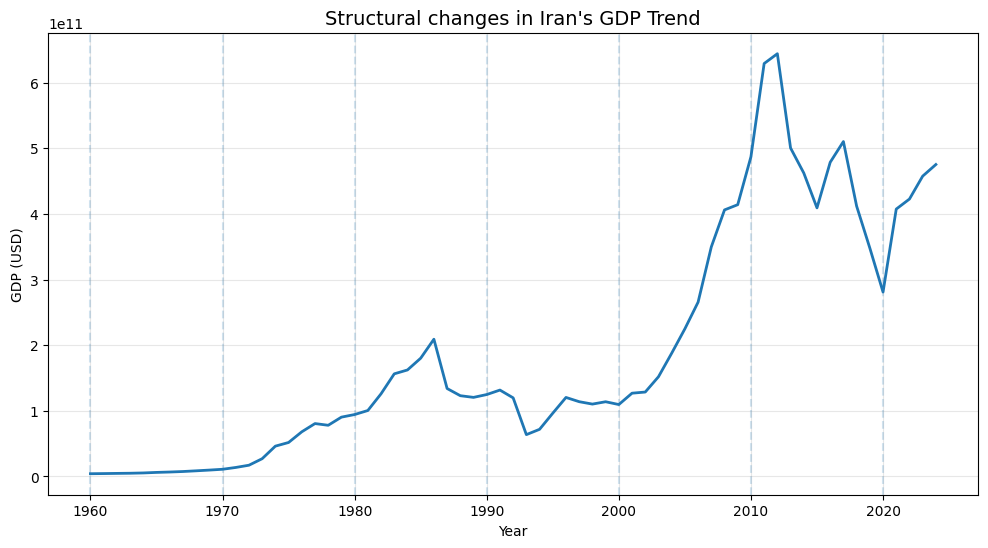

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["GDP_Current_USD"], linewidth=2)

for year in range(df["Year"].min(),df["Year"].max(),10):
    plt.axvline(year,linestyle= "--",alpha =0.2)

plt.title("Structural changes in Iran's GDP Trend",fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.grid(alpha =0.3)
plt.show()

We can analysze the graph and see that the GDP was stagnant from 1980 to 200 and then suddenly we can see sudden trend change and had a BOOM after the BOOM it went in correction phase and currently its in recovery phase

<h4>Comparing GDP growth rate of different decade </h4>

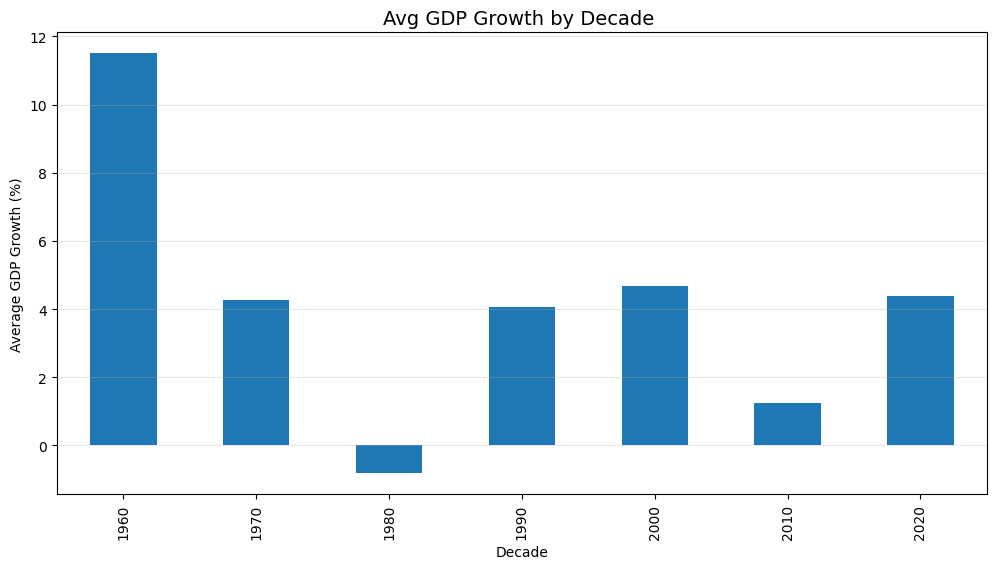

In [15]:
df["Decade"]= (df["Year"]//10)*10

plt.figure(figsize=(12,6))
df.groupby(df["Decade"])["GDP_Growth_Percent"].mean().plot(kind="bar")
plt.title("Avg GDP Growth by Decade ",fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average GDP Growth (%)")
plt.grid(axis="y",alpha=0.3)
plt.show()

After the exponential decline in GDP after 1960-1969 we can see that the GDP is staganent in every decade with negative trends in 1980-1990 

<h3>2. GDP VS GDP per Capita (Population effect)</h3>

<h4>GDP VS GDP per Capital side by side (Using time series)<h4>

Since high GDP does not always mean that people are better off. Per capita of people tells us the real story

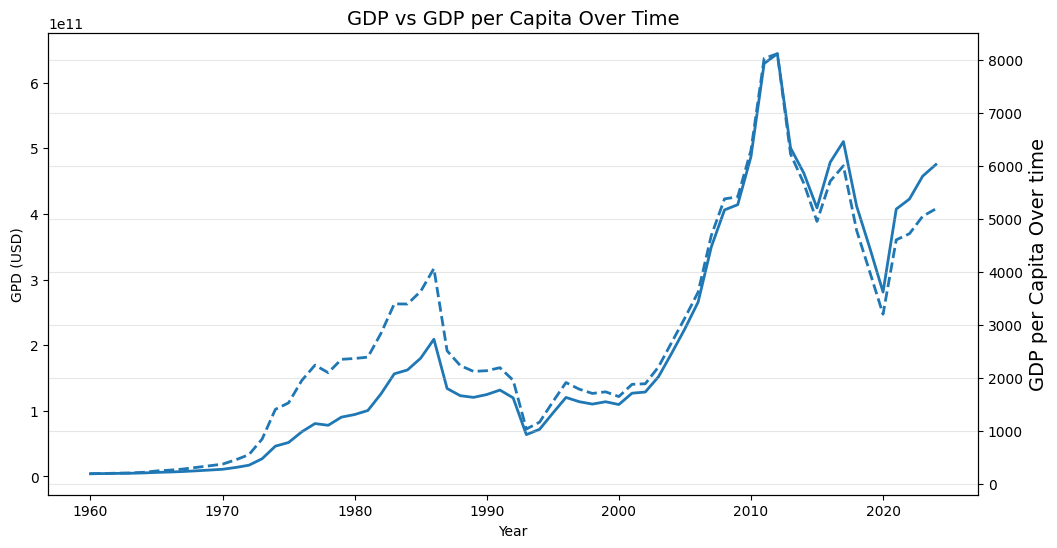

In [16]:
fig, ax1=plt.subplots(figsize=(12,6))

ax1.plot(df["Year"],df["GDP_Current_USD"], linewidth=2)
ax1.set_xlabel("Year")
ax1.set_ylabel("GPD (USD)")
ax1.tick_params(axis="y")

ax2=ax1.twinx()
ax2.plot(df["Year"],df["GDP_Per_Capita_USD"],linewidth=2,linestyle="--")
ax2.set_ylabel("GDP per Capita Over time", fontsize=14)

plt.title("GDP vs GDP per Capita Over Time",fontsize=14)
plt.grid(alpha=0.3)
plt.show()

The per capita GDP was much better between 1970 and 2000 especially in 1975-1977 after that following GDP significantly but we can see recently the GDP per capita has been underperforming GDP which is not a good sign

<h4>Population growth VS GDP per capita</h4>

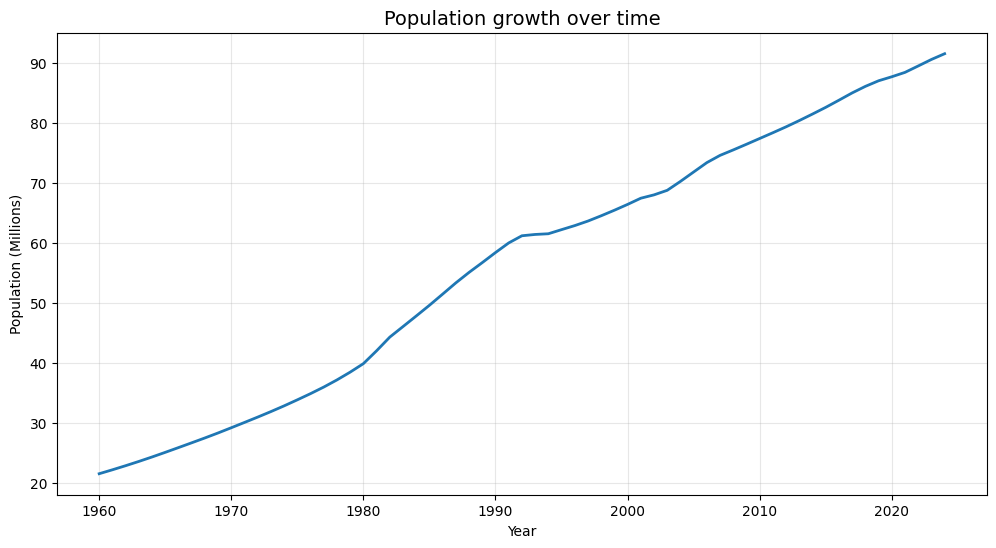

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"],df["Population_Total"]/ 1e6, linewidth=2)
plt.title("Population growth over time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.grid(alpha=0.3)
plt.show()

The population over the years have been increasing linearly like any other country showcasing healthy growth of population but as we have seen from previous graph that per capita GDP declined after 2010-2011 which may have caused hardship for the people, recently trend shows it has been recovering again.

<h4>Divergence between GDP and Per capita GDP</h4>

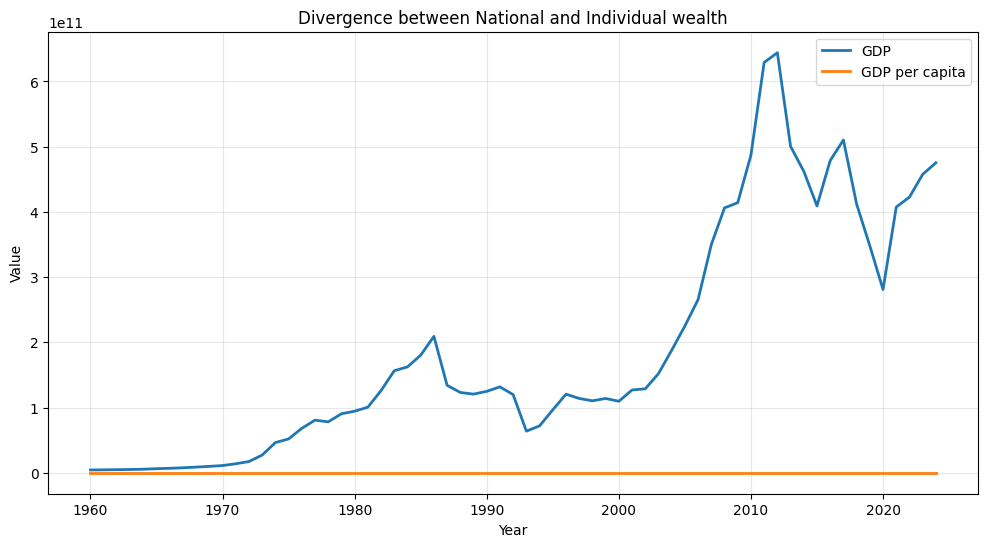

In [18]:
plt.figure(figsize=(12,6))

plt.plot(df["Year"],df["GDP_Current_USD"],label="GDP",linewidth=2)
plt.plot(df["Year"],df["GDP_Per_Capita_USD"],label="GDP per capita",linewidth=2)

plt.title("Divergence between National and Individual wealth")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

We see a straight line in GDP per capita because the scale is different, the GDP (of country) is usually measured in billions/millions/trillions of $$ but the GDP per capita is very low (10-15k $) hence, we see a flat line.

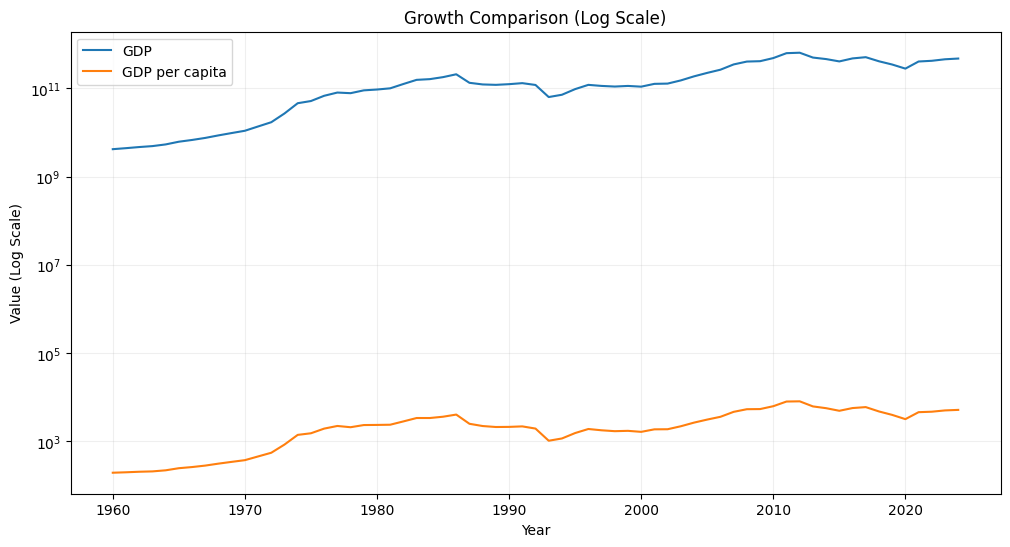

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["GDP_Current_USD"], label="GDP")
plt.plot(df["Year"], df["GDP_Per_Capita_USD"], label="GDP per capita")

plt.yscale('log') # This changes the scale to powers of 10
plt.title("Growth Comparison (Log Scale)")
plt.xlabel("Year")
plt.ylabel("Value (Log Scale)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

See?? On the logarithmic scale it is a much more clear picture both graph looks almost same but the scale of graph is very large...The per capita GDP is really low which indicate the economy is not healthy

<h4>GDP vs GDP per capita (using scatterplot)</h4>

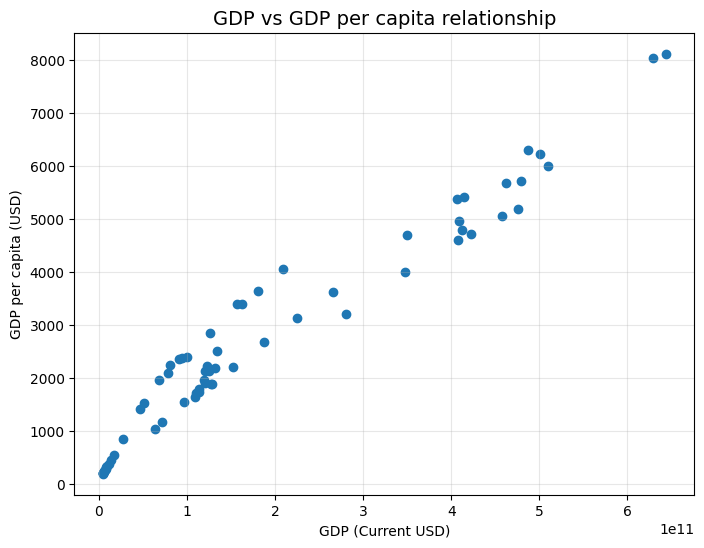

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df["GDP_Current_USD"], df["GDP_Per_Capita_USD"])
plt.title("GDP vs GDP per capita relationship", fontsize=14)
plt.xlabel("GDP (Current USD)")
plt.ylabel("GDP per capita (USD)")
plt.grid(alpha=0.3)
plt.show()

we can see from the graph that the reveals non-linear relationship.

<h4>Decade-wise Prosperity Comparision</h4>

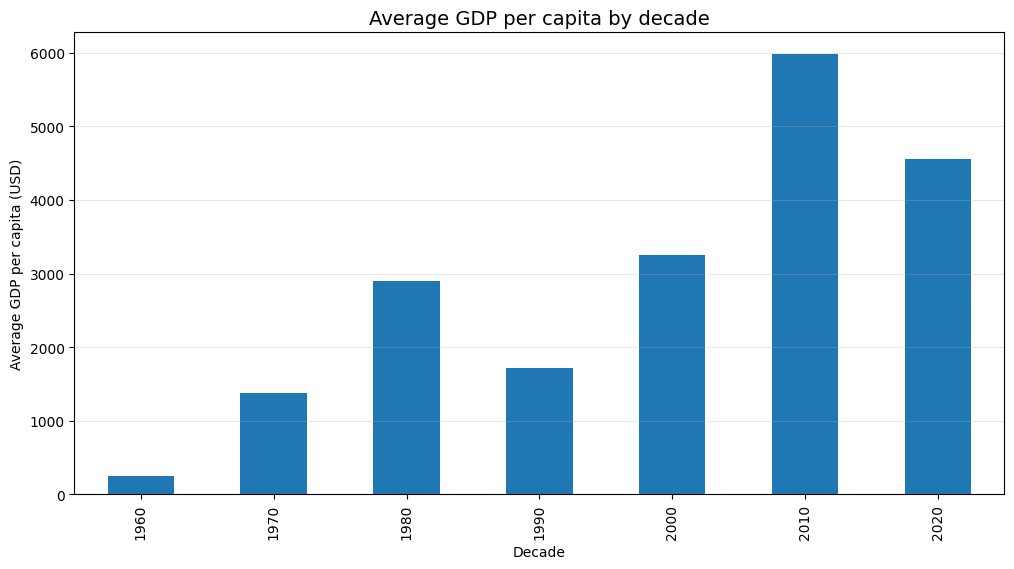

In [21]:
df["Decade"]= (df["Year"]//10)*10

plt.figure(figsize=(12,6))
df.groupby("Decade")["GDP_Per_Capita_USD"].mean().plot(kind="bar")
plt.title("Average GDP per capita by decade",fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average GDP per capita (USD)")
plt.grid(axis="y",alpha=0.3)
plt.show()

We can say from te graph that Per capita GDP Increased in 1980-1990 declinging in 1990-200 and then again from 2000 it has shown strong growth trend till 2010-2020 after 2020 it declined a bit but currently we can say its recovering

<h3>3. Inflation dynamics & Economic stress</h3>

<h4>Inflation rate over time</h4>

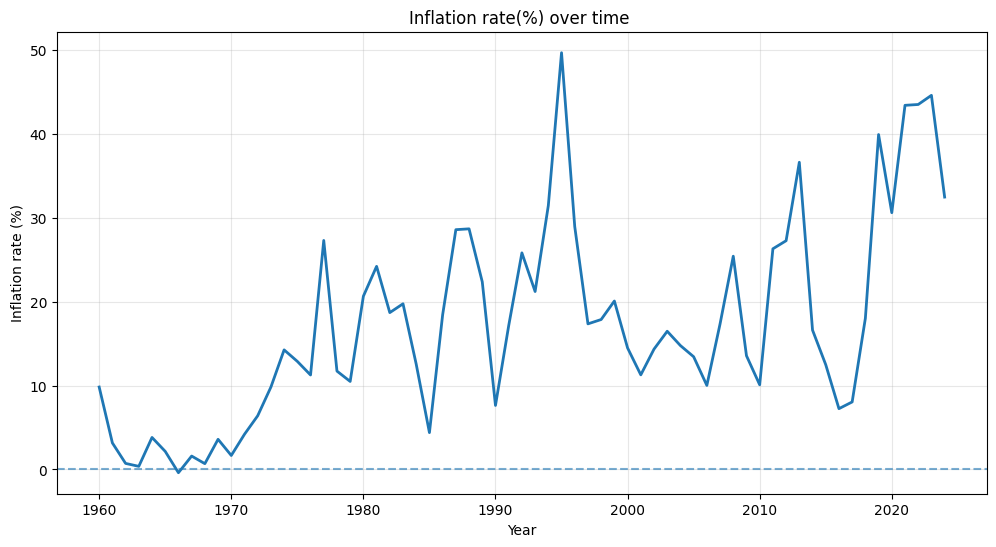

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["Inflation_Rate_Percent"], linewidth=2)
plt.axhline(0, linestyle="--",alpha=0.6)

plt.title("Inflation rate(%) over time ")
plt.xlabel("Year")
plt.ylabel("Inflation rate (%)")
plt.grid(alpha=0.3)
plt.show()

Significant economic stress was noticed in 1995-1996 spiking the inflation rate upto 50% and after that we see a period of relief, now again the inflation rate is increased to upto 30-40%

<h4>Highlight high & hyper-inflation periods</h4>

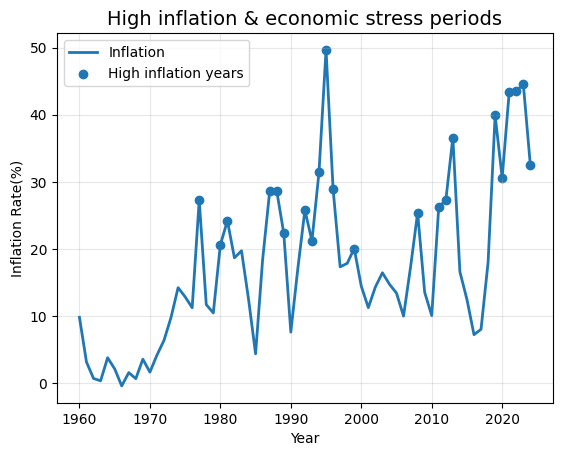

In [23]:
plt.plot(df["Year"],df["Inflation_Rate_Percent"],linewidth=2,label="Inflation")
plt.scatter(
    df[df["Inflation_Rate_Percent"]>20]["Year"],
    df[df["Inflation_Rate_Percent"]>20]["Inflation_Rate_Percent"],
    label="High inflation years"
)

plt.title("High inflation & economic stress periods",fontsize=14)
plt.xlabel("Year")
plt.ylabel("Inflation Rate(%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<h4>Long Inflation(Rolling mean)</h4>

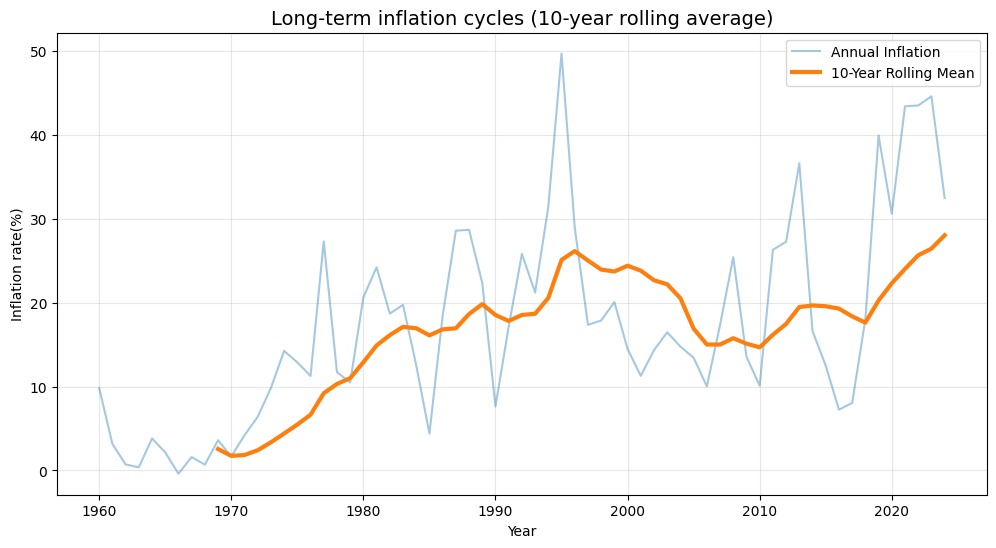

In [24]:
df["Inflation_Rolling_10Y"]=df["Inflation_Rate_Percent"].rolling(window=10).mean()

plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["Inflation_Rate_Percent"], alpha=0.4, label="Annual Inflation")
plt.plot(df["Year"],df["Inflation_Rolling_10Y"], linewidth=3, label="10-Year Rolling Mean")

plt.title("Long-term inflation cycles (10-year rolling average)",fontsize=14)
plt.xlabel("Year")
plt.ylabel("Inflation rate(%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The rolling 10 year mean indicated increasing indlation

<h4>Inflation Spikes vs GDP Growth</h4>

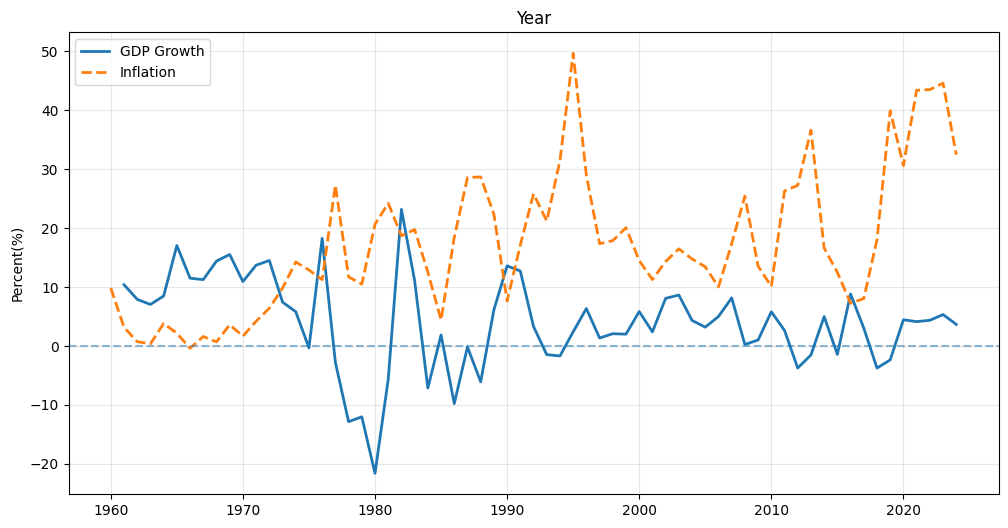

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, label="GDP Growth")
plt.plot(df["Year"], df["Inflation_Rate_Percent"], linewidth=2, linestyle="--",label="Inflation")

plt.axhline(0,linestyle="--",alpha=0.5)
plt.title("Year")
plt.ylabel("Percent(%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The GDP of country is stagenet and Inflation is rising indicating a really poor growth of economy

<h4>Inflation volatility across decades</h4>

<Figure size 1200x600 with 0 Axes>

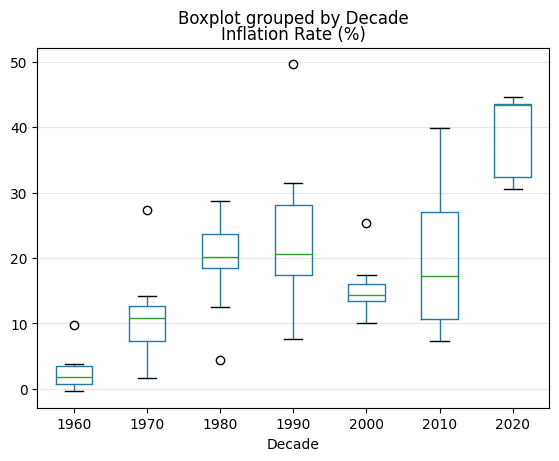

In [26]:
df["Decade"]= (df["Year"]//10)*10

plt.figure(figsize=(12,6))
df.boxplot(
    column="Inflation_Rate_Percent",
    by="Decade",
    grid= False
)

plt.title("Inflation Rate (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

<h4>Inflation distribution</h4>

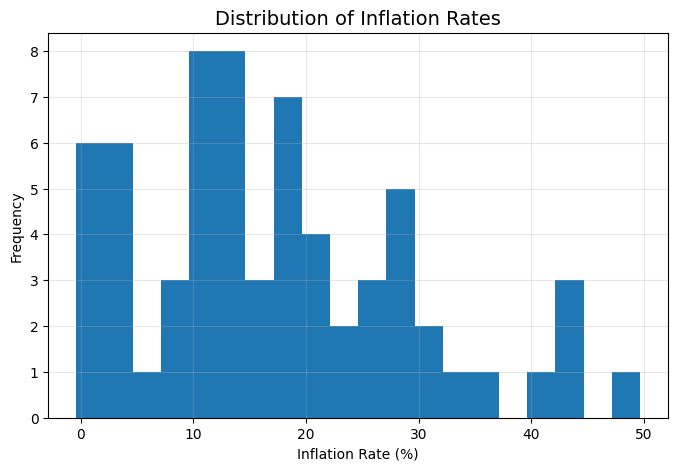

In [27]:
plt.figure(figsize=(8,5))
plt.hist(df["Inflation_Rate_Percent"],bins =20)
plt.title("Distribution of Inflation Rates", fontsize=14)
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

We can see that the inflation rate if more distributed towards 10-20% side

<h3>4. Exchange rate stability vs Economic growth</h3>

<h4>Official exchange rate over time</h4>

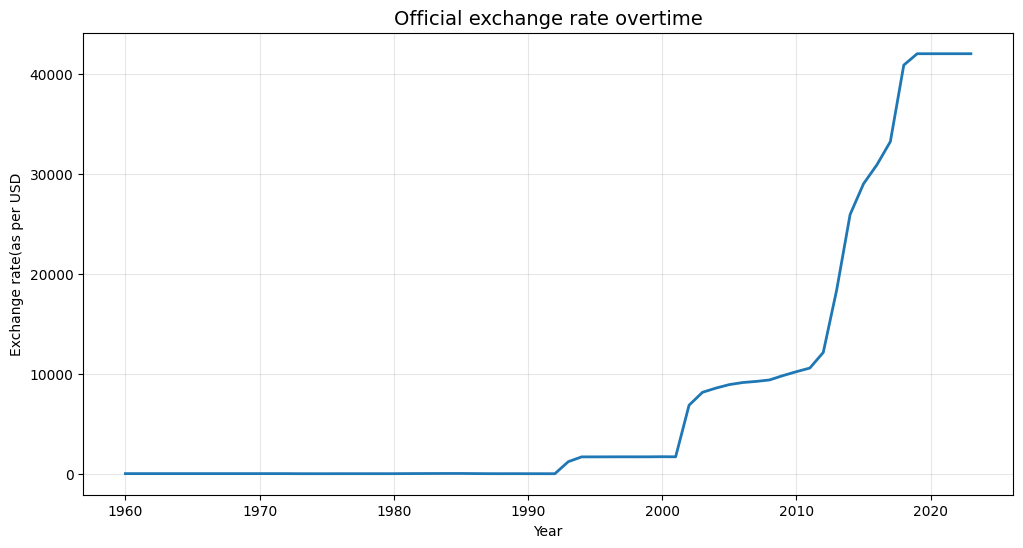

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["Official_Exchange_Rate"], linewidth=2)
plt.title("Official exchange rate overtime",fontsize=14)
plt.xlabel("Year")
plt.ylabel("Exchange rate(as per USD")
plt.grid(alpha =0.3)
plt.show()

After 2000 we can see that the exchange rates have shot up significantly indicating the value of currency depreciated against the USD 

<h4>Sudden exchange rate spike period</h4>

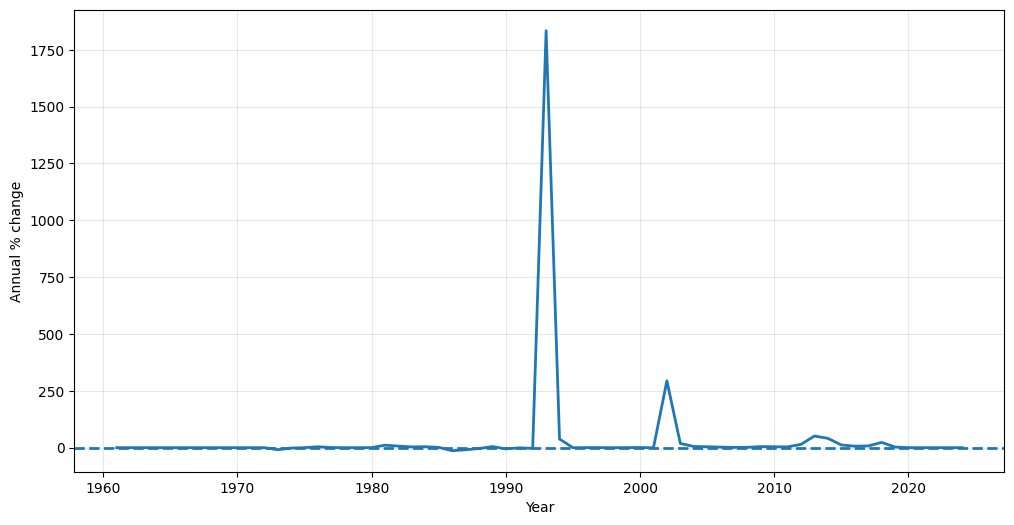

In [29]:
df["Exchange_Rate_Change"]= df["Official_Exchange_Rate"].pct_change()*100

plt.figure(figsize=(12,6))
plt.plot(df["Year"],df["Exchange_Rate_Change"], linewidth=2)
plt.axhline(0,linestyle="--",linewidth=2)
plt.xlabel("Year")
plt.ylabel("Annual % change")
plt.grid(alpha =0.3)
plt.show()

Holey moly we can see a sudden 1750%+ change in exchange rate in around 1993-1995 and then it came back to normal with a really small spike of 200%+ in 2001-2003 

<h4>Exchange rate vs inflation</h4>

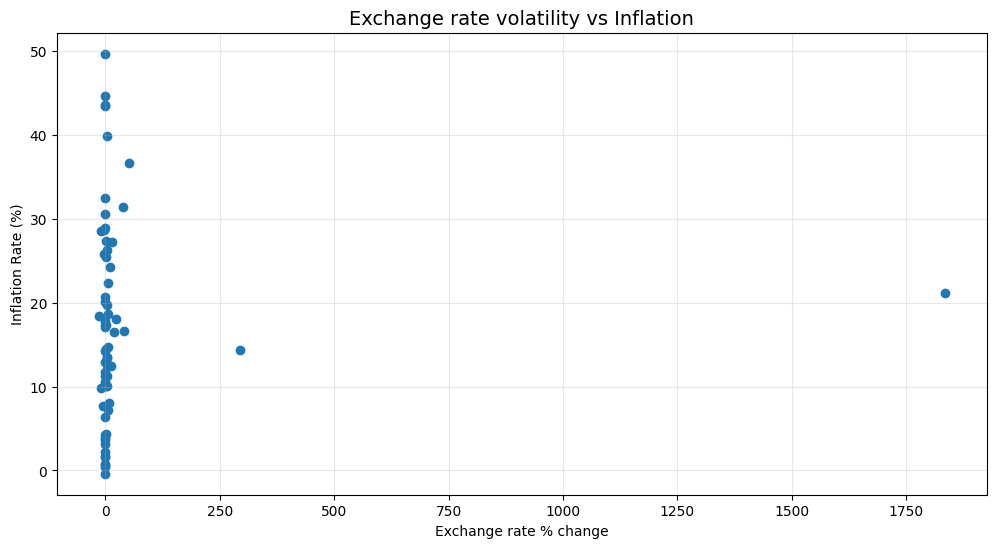

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(df["Exchange_Rate_Change"],df["Inflation_Rate_Percent"])
plt.title("Exchange rate volatility vs Inflation", fontsize=14)
plt.xlabel("Exchange rate % change")
plt.ylabel("Inflation Rate (%)")
plt.grid(alpha=0.3)
plt.show()

We can see that the graph is almost straight line with Inflation rate increasing in a straight line but exchange rate is not much affected we also have 2 outliers 
when the inflation rate was ~21% and exchange rate shot upto 1750%+ another when inflation was around ~15% when exchange rate was 250%+

<h4>Exchange rate vs GDP growth<h4>

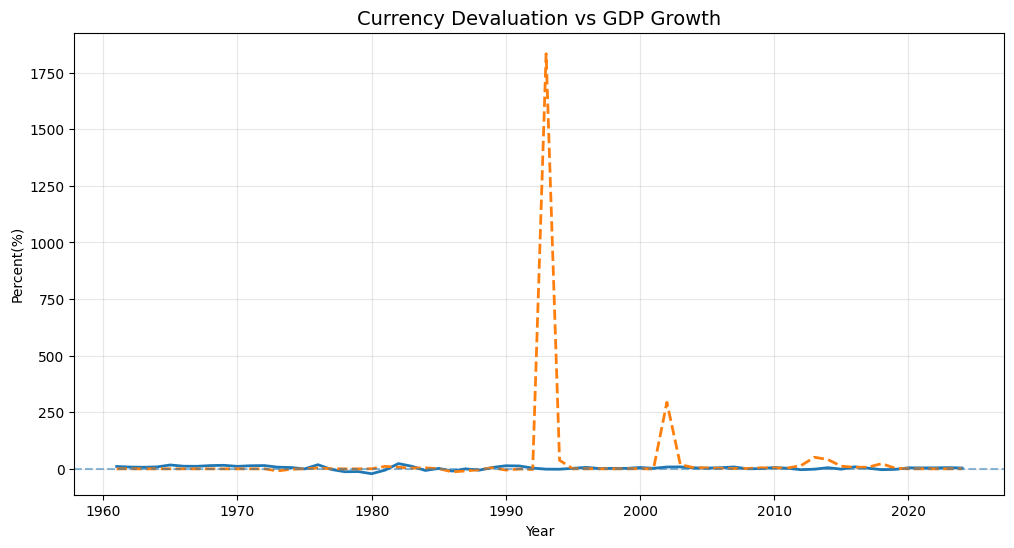

In [31]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["GDP_Growth_Percent"],linewidth=2,label="GDP Growth")
plt.plot(df["Year"], df["Exchange_Rate_Change"],linewidth=2,linestyle="--",label="Exchange Rate change")
plt.axhline(0,linestyle="--",alpha =0.5)
plt.title("Currency Devaluation vs GDP Growth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percent(%)")
plt.grid(alpha=0.3)
plt.show()

<h4>Exchange Rate volatility across decades</h4>

<Figure size 1200x600 with 0 Axes>

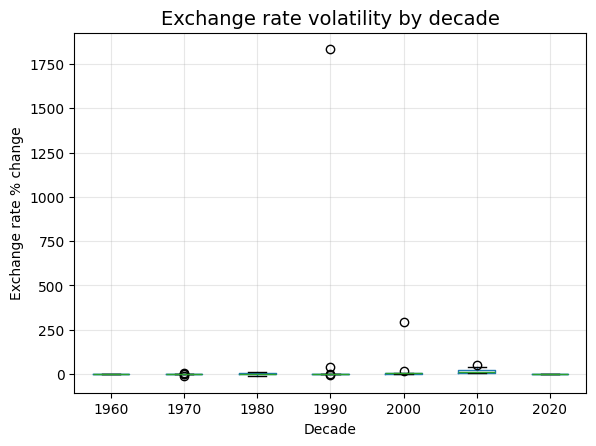

In [32]:
df["Decade"] = (df["Year"]//10)*10
plt.figure(figsize=(12,6))
df.boxplot(
    column= "Exchange_Rate_Change",
    by="Decade",
    grid=False

)

plt.title("Exchange rate volatility by decade", fontsize=14)
plt.suptitle("")
plt.xlabel("Decade")
plt.ylabel("Exchange rate % change")
plt.grid(alpha=0.3)
plt.show()


<h4>Exchange Rate vs GDP growth</h4>

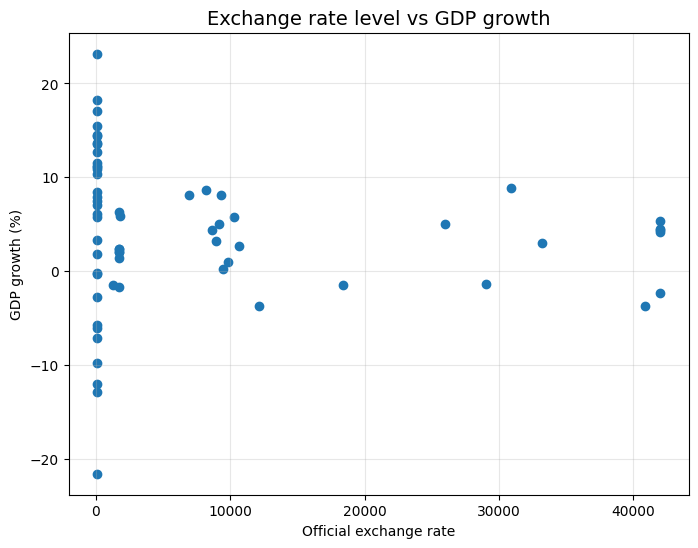

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Official_Exchange_Rate"], df["GDP_Growth_Percent"])
plt.title("Exchange rate level vs GDP growth", fontsize=14)
plt.xlabel("Official exchange rate")
plt.ylabel("GDP growth (%)")
plt.grid(alpha=0.3)
plt.show()

We can see that GDP growth is concentrated in +10% to -10% region with official exchange rate increasing we can also see that when official exchange rate was 0 the GDP growth were high

<h3>5. Population growth pressure on economy</h3>

<h4>Total population overtime</h4>

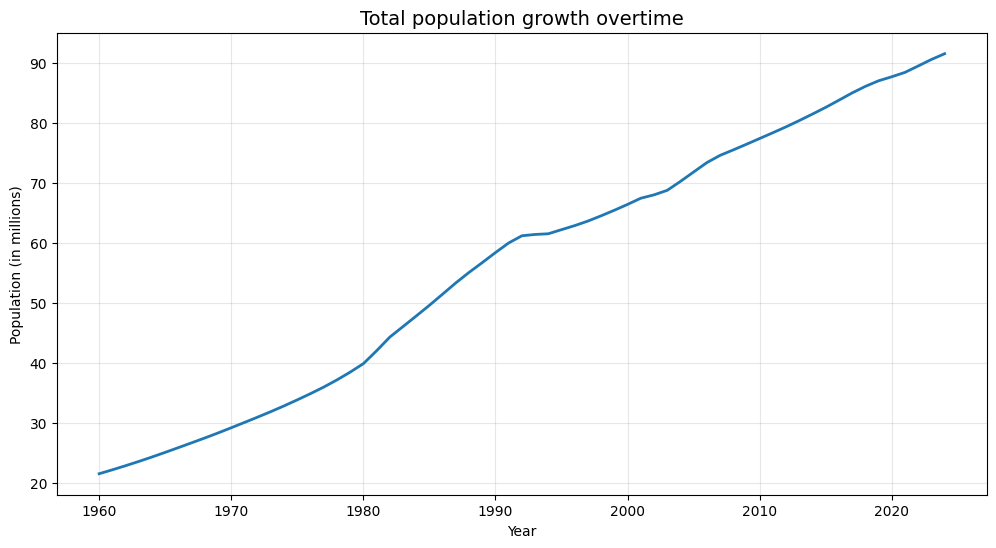

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["Population_Total"]/ 1e6, linewidth=2)

plt.title("Total population growth overtime", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (in millions)")
plt.grid(alpha=0.3)
plt.show()

<h4>Population growth rate </h4>

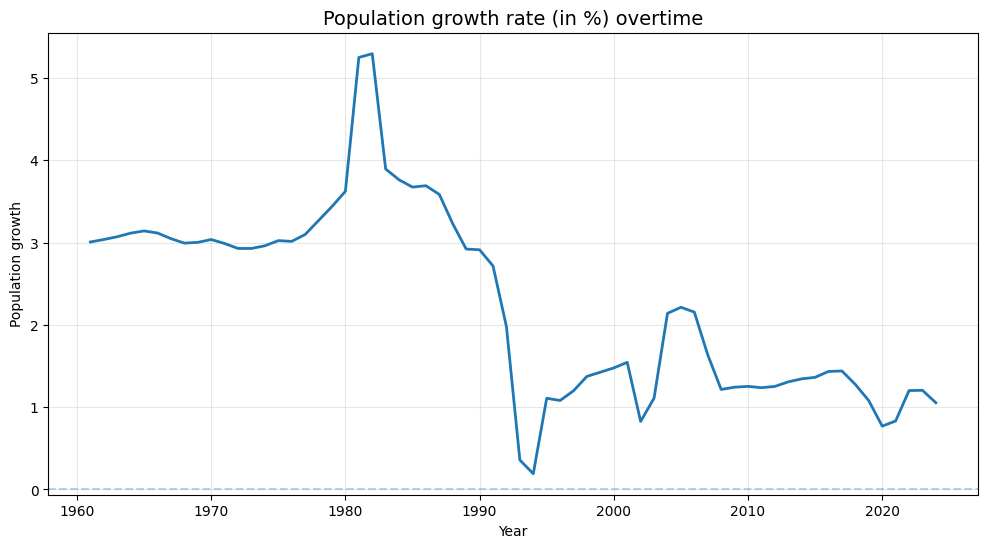

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["Population_Growth_Percent"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.3)

plt.title("Population growth rate (in %) overtime", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population growth")
plt.grid(alpha=0.3)
plt.show()

We can see that population growth declined in 1992-1994 and then stabilising afterwards but it is still not showing any signs to recover 

<h4>Long term population growth</h4>

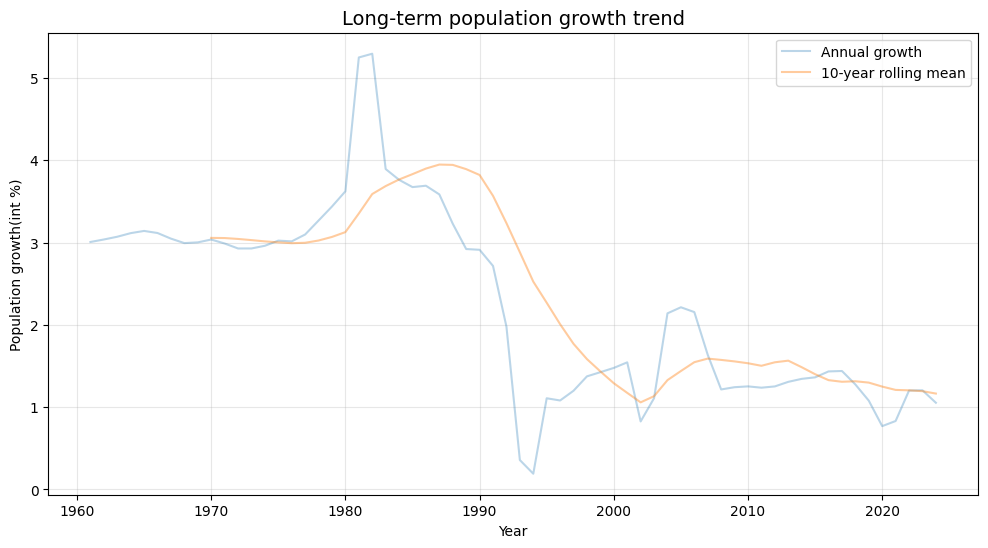

In [36]:
df["Population_Growth_Rolling_10Y"] = df["Population_Growth_Percent"].rolling(window=10).mean()

plt.figure(figsize=(12,6))
plt.plot(df["Year"],df["Population_Growth_Percent"],alpha=0.3, label="Annual growth")
plt.plot(df["Year"],df["Population_Growth_Rolling_10Y"],alpha =0.4, label ="10-year rolling mean")

plt.title("Long-term population growth trend",fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population growth(int %)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

We can seet that the 10-year rolling mean is indicating a decline in population growth with significant drop starting in the year 1990

<h4>Economic growth vs population growth</h4>

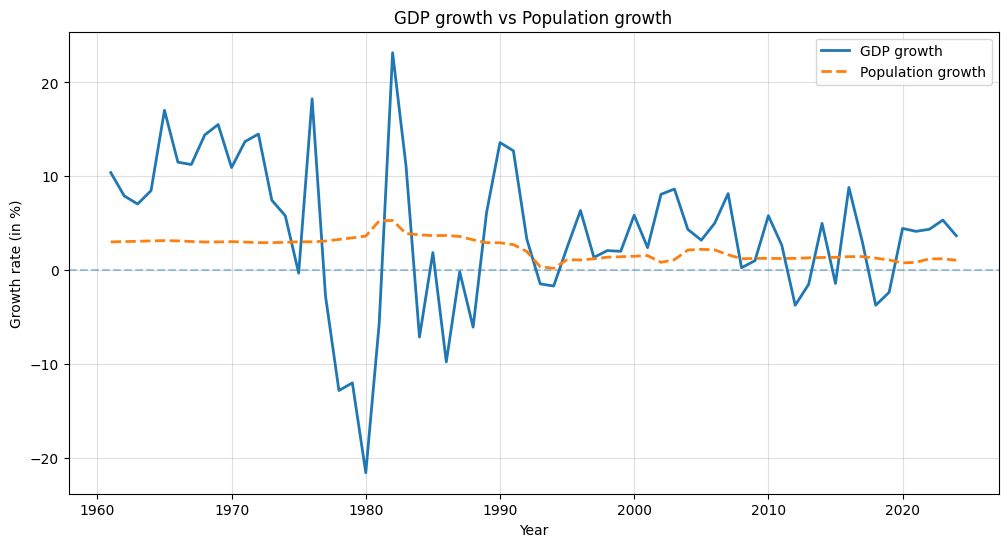

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth =2,label="GDP growth")
plt.plot(df["Year"],df["Population_Growth_Percent"], linewidth=2,linestyle="--",label="Population growth")

plt.axhline(0,linestyle="--",alpha=0.4)
plt.title("GDP growth vs Population growth")
plt.xlabel("Year")
plt.ylabel("Growth rate (in %)")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

Above graph shows that population growth and GDP growth were mostly affected when there were years of major tesnsion/revolution in the country

<h4>GPD per capita vs Population growth</h4>

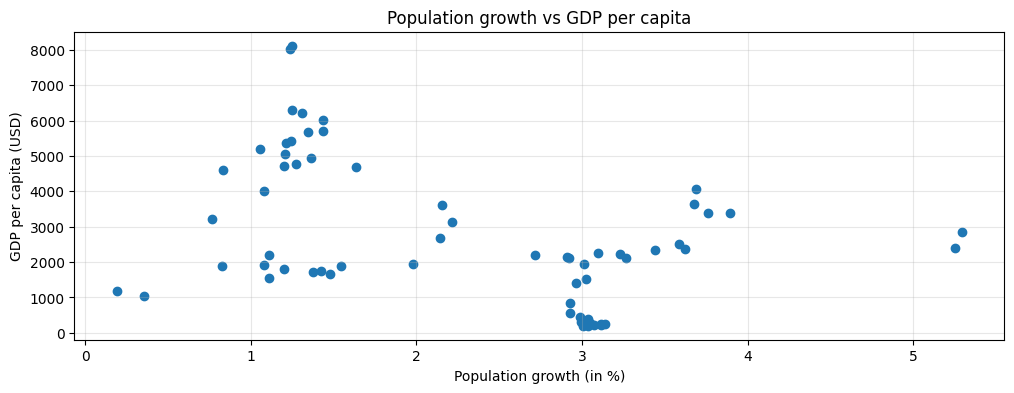

In [38]:
plt.figure(figsize=(12,4))
plt.scatter(df["Population_Growth_Percent"],df["GDP_Per_Capita_USD"])
plt.title("Population growth vs GDP per capita")
plt.xlabel("Population growth (in %)")
plt.ylabel("GDP per capita (USD)")
plt.grid(alpha=0.3)
plt.show()

We can see that when population growth was low(~1-2%) the per capita GDP was high but as we see population increase the per capita GDP decreases, but we can see that when population growth was ~3% per capita GDP dropped significantly to ~1k$ 

<h4>Sustainability indicator: GDP Growth- Population growth</h4>

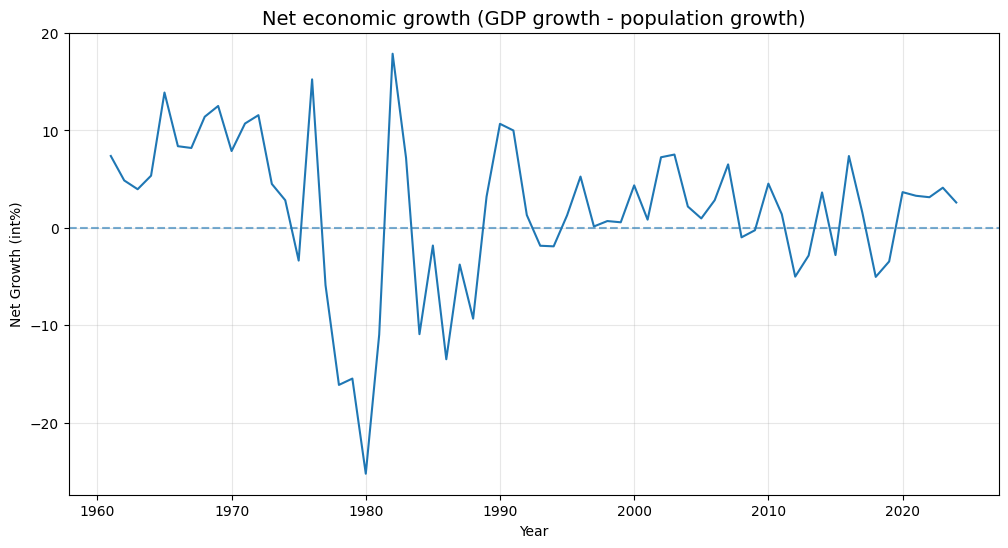

In [39]:
df["Net_Economic_Growth"]= df["GDP_Growth_Percent"]-df["Population_Growth_Percent"]
plt.figure(figsize=(12,6))
plt.plot(df["Year"],df["Net_Economic_Growth"])
plt.axhline(0,linestyle="--", alpha=0.6)

plt.title("Net economic growth (GDP growth - population growth)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Net Growth (int%)")
plt.grid(alpha=0.3)
plt.show()

Economic growth is not indicating a growth, it is constant for almost 4 decades now 

<h4>Decade wise population comparision</h4>

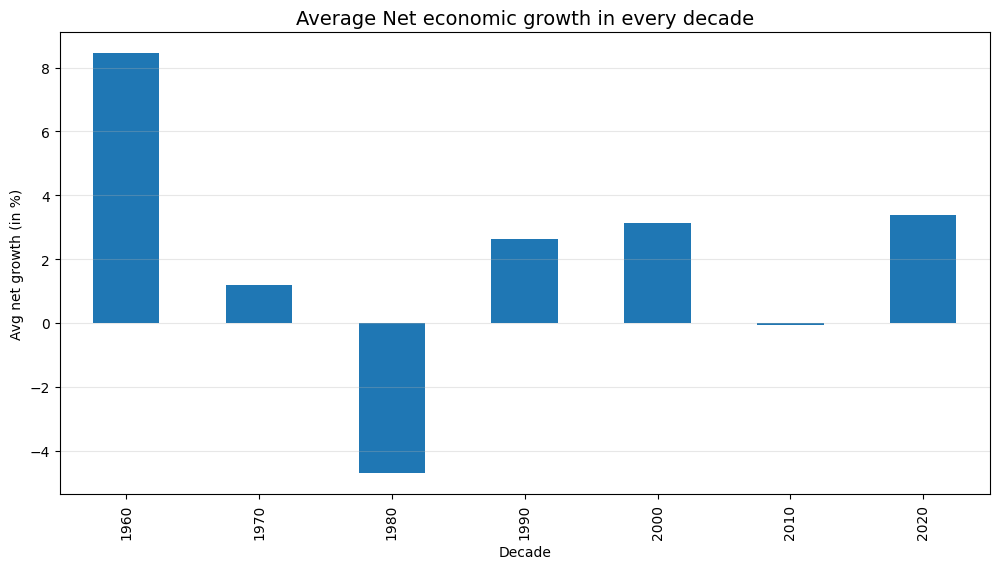

In [40]:
df["Decade"]= (df["Year"] // 10 *10)
plt.figure(figsize=(12,6))
df.groupby("Decade")["Net_Economic_Growth"].mean().plot(kind = "bar")
plt.title("Average Net economic growth in every decade",fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Avg net growth (in %)")
plt.grid(axis="y",alpha=0.3)
plt.show()

A significant drop in population(\~4%) was seen in the decade 190-1989 with the highest population growth rate year(\~8%) in the decade 1960-1969 

<h3>6. Trade behaviour & global integration</h3>

<h4>Export vs Import overtime</h4>

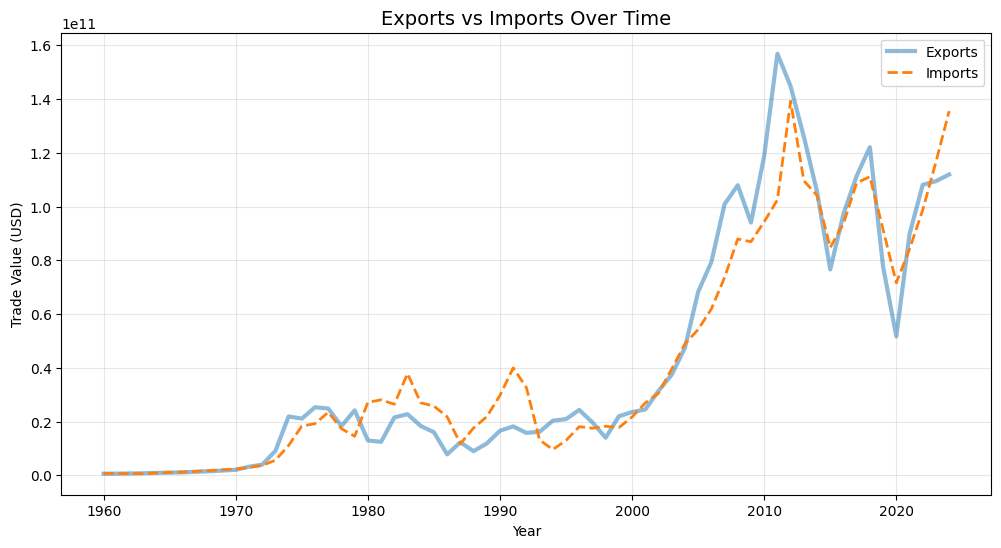

In [41]:
plt.figure(figsize=(12,6))
plt.plot(df["Year"],df["Exports_USD"],linewidth =3, label="Exports", alpha =0.5)
plt.plot(df["Year"],df["Imports_USD"],linewidth=2,linestyle="--",label="Imports")

plt.title("Exports vs Imports Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Value (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

We can see that the Imports and Exports both increased significantly after the year 2000, the import- export were peak at the year 2011-2012 then it declined till 2020 and currently its on its recovery phase   

<h4>Trade Openneess overtime(Gloabal integration indicator)</h4>

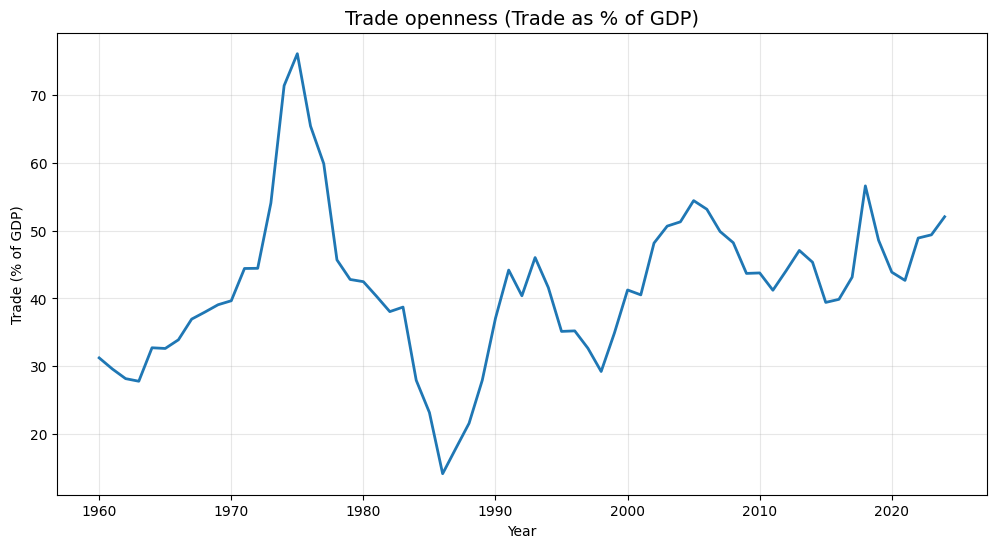

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Trade_Percent_GDP"], linewidth=2)

plt.title("Trade openness (Trade as % of GDP)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade (% of GDP)")
plt.grid(alpha=0.3)
plt.show()

In 1974-1976 trade playes a crucial role in contributing to GDP of the country(~70%+) but then it declined to <20% in the year 1986-1987 and from that time its slowly showing progress to contribute more and more to the GDP(recovering)

<h4>Trade expansion vs Contraction phases</h4>

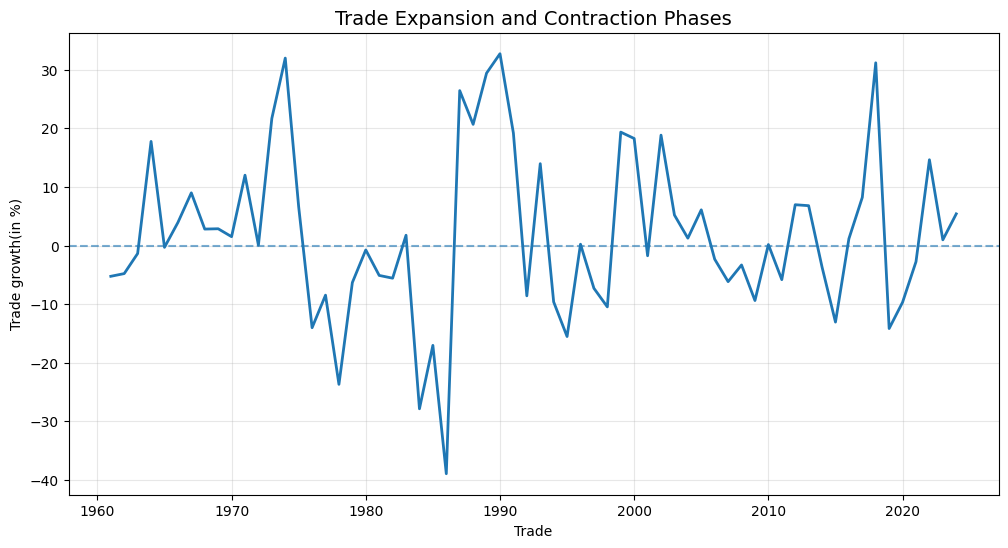

In [43]:
df["Trade_Growth"]= df["Trade_Percent_GDP"].pct_change() *100
plt.figure(figsize=(12,6))
plt.plot(df["Year"],df["Trade_Growth"], linewidth=2)
plt.axhline(0,linestyle="--",alpha =0.6)

plt.title("Trade Expansion and Contraction Phases", fontsize=14)
plt.xlabel("Trade")
plt.ylabel("Trade growth(in %)")
plt.grid(alpha=0.3)
plt.show()

The trade growth shows a lotof fluctuations especially during the year 1986-1987 tanking almost below -30% which is really harmful to the economy 

<h4>Trade dependency & Econoic growth</h4>

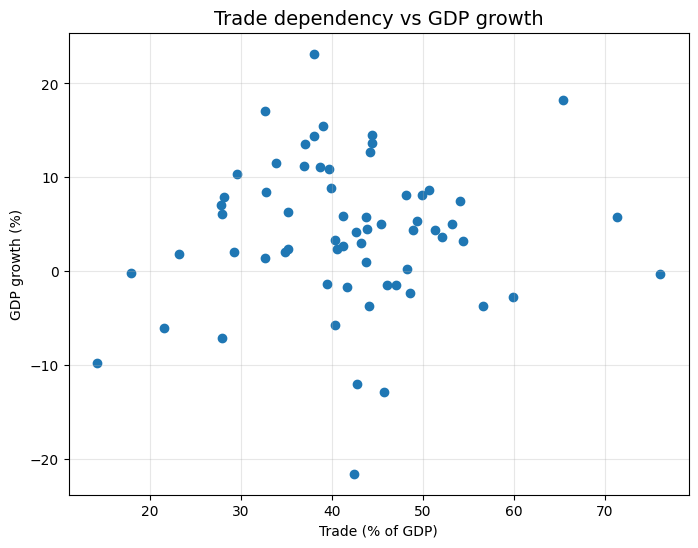

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Trade_Percent_GDP"], df["GDP_Growth_Percent"])
plt.title("Trade dependency vs GDP growth", fontsize=14)
plt.xlabel("Trade (% of GDP)")
plt.ylabel("GDP growth (%)")
plt.grid(alpha=0.3)
plt.show()

We can see that the Trade dependency plays imp role in GDP growth, trades contribute to around 40-50% of GDP in relation to that the GDP growth is around 0-10%  

<h4>Trade response during economical crises</h4>

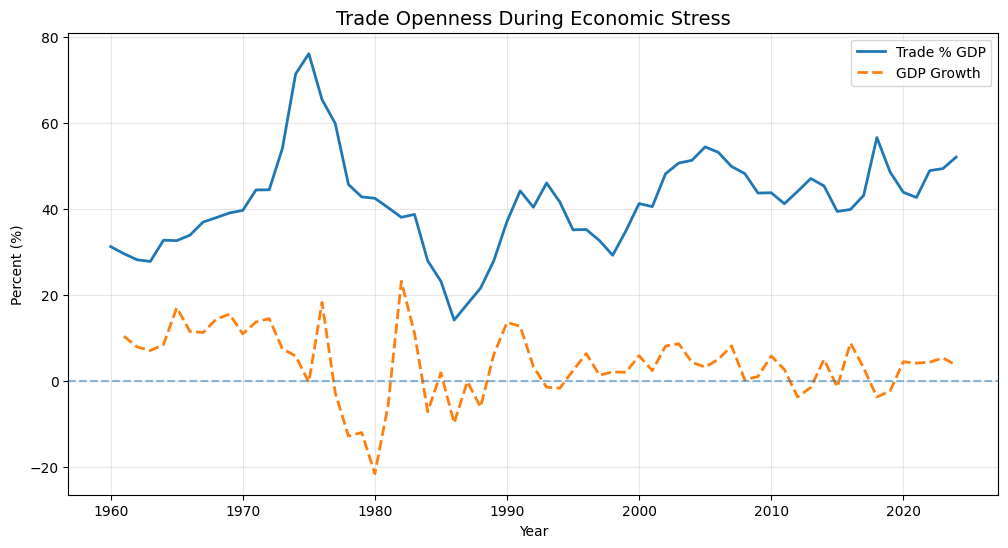

In [45]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["Trade_Percent_GDP"], linewidth=2, label="Trade % GDP")
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, linestyle="--", label="GDP Growth")

plt.axhline(0, linestyle="--", alpha=0.5)

plt.title("Trade Openness During Economic Stress", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<h4> Export-Import balance</h4>

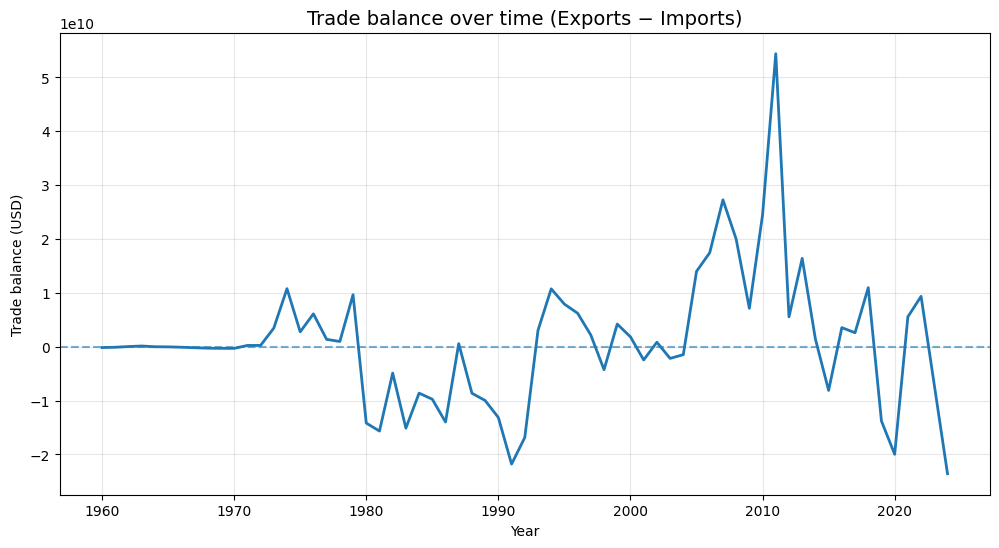

In [46]:
df["Trade_Balance"] = df["Exports_USD"] - df["Imports_USD"]

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Trade_Balance"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6)

plt.title("Trade balance over time (Exports − Imports)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade balance (USD)")
plt.grid(alpha=0.3)
plt.show()

We can see that trade balance was highest in the year around 2011-2012 and then it started declining and is still declining, we can see that the period of 1979-1992 was period of really miserable since the Trade balance was negative the whole time

<h4>Decade wise trade openness</h4>

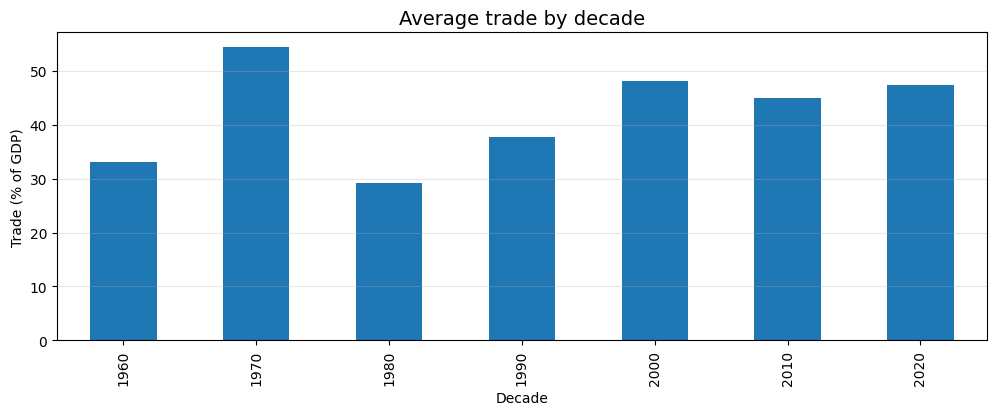

In [47]:
df["Decad"]=(df["Year"]//10)*10

plt.figure(figsize=(12,4))
df.groupby("Decade")["Trade_Percent_GDP"].mean().plot(kind="bar")
plt.title("Average trade by decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Trade (% of GDP)")
plt.grid(axis="y",alpha=0.3)
plt.show()

<h3>Trade balance evolution</h3>

<h4>Balance trade overtime</h4>

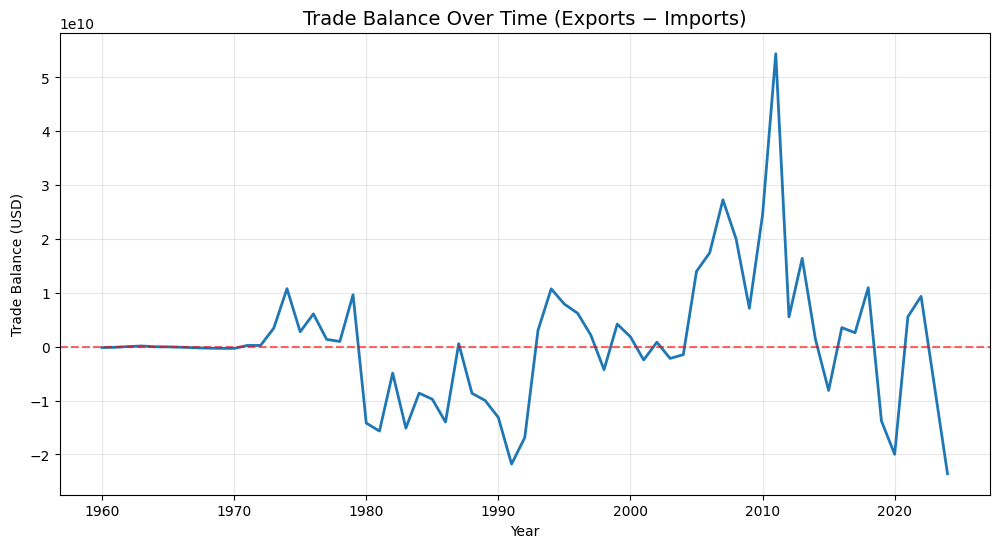

In [48]:
df["Trade_Balance"] = df["Exports_USD"] - df["Imports_USD"]

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Trade_Balance"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6, color="red")

plt.title("Trade Balance Over Time (Exports − Imports)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD)")
plt.grid(alpha=0.3)
plt.show()

<h4>Highlight surplus & Deficit year</h4>

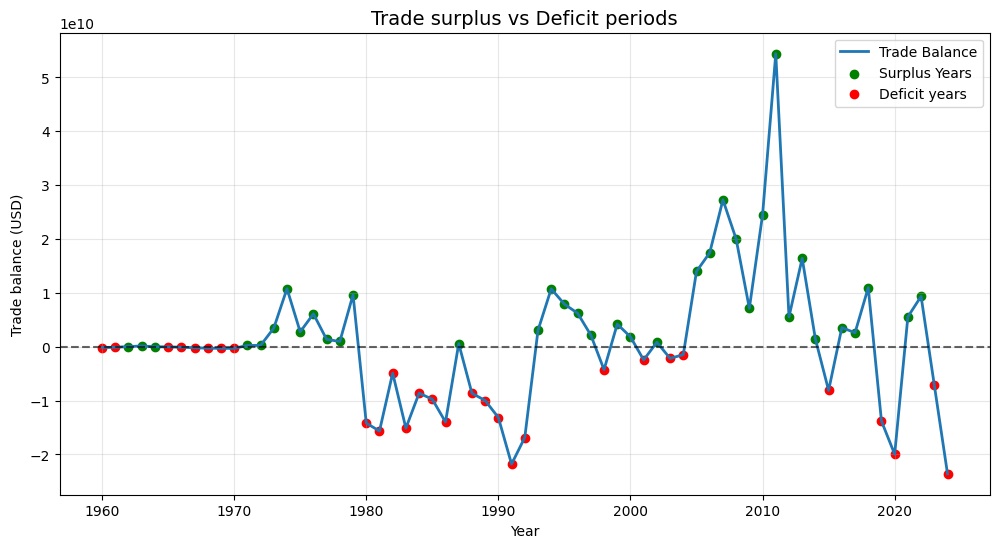

In [49]:
plt.figure(figsize=(12,6))

plt.plot(df["Year"], df["Trade_Balance"], linewidth=2, label="Trade Balance")

plt.scatter(
    df[df["Trade_Balance"]>0]["Year"],
    df[df["Trade_Balance"]>0]["Trade_Balance"],
    color = "green",label="Surplus Years"
)

plt.scatter(
    df[df["Trade_Balance"]<0]["Year"],
    df[df["Trade_Balance"]<0]["Trade_Balance"],
    color="red", label="Deficit years"
)

plt.axhline(0,linestyle="--",alpha=0.6,color="black")
plt.title("Trade surplus vs Deficit periods", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade balance (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The years of deficit and year of surplus are clearly indicated in the charts

<h4>Trade balance vs GDP growth</h4>

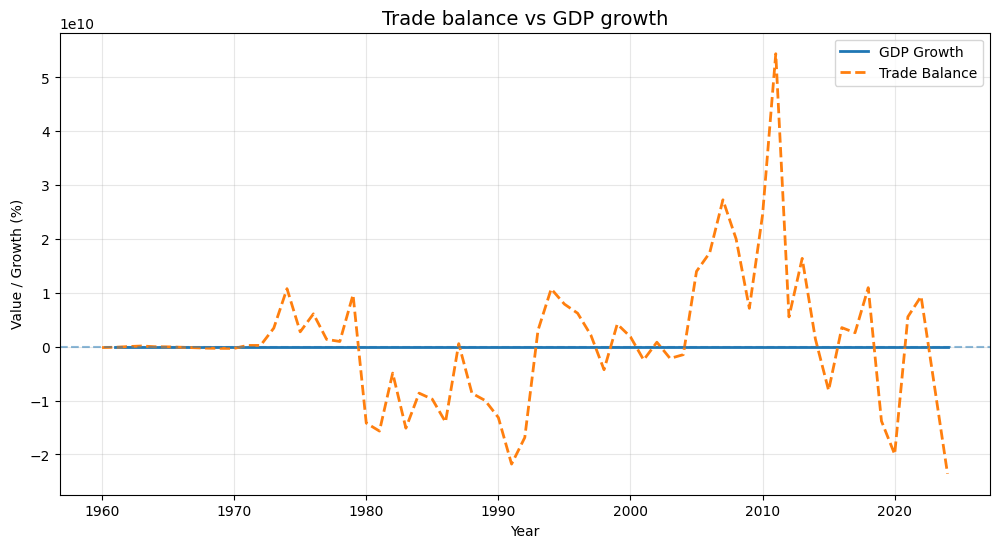

In [50]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, label="GDP Growth")
plt.plot(df["Year"], df["Trade_Balance"], linewidth=2, linestyle="--", label="Trade Balance")

plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("Trade balance vs GDP growth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Value / Growth (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

GDP growth remaiend almost constant in comparision to Trade balance

<h3>Trade balance vs Volatility</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

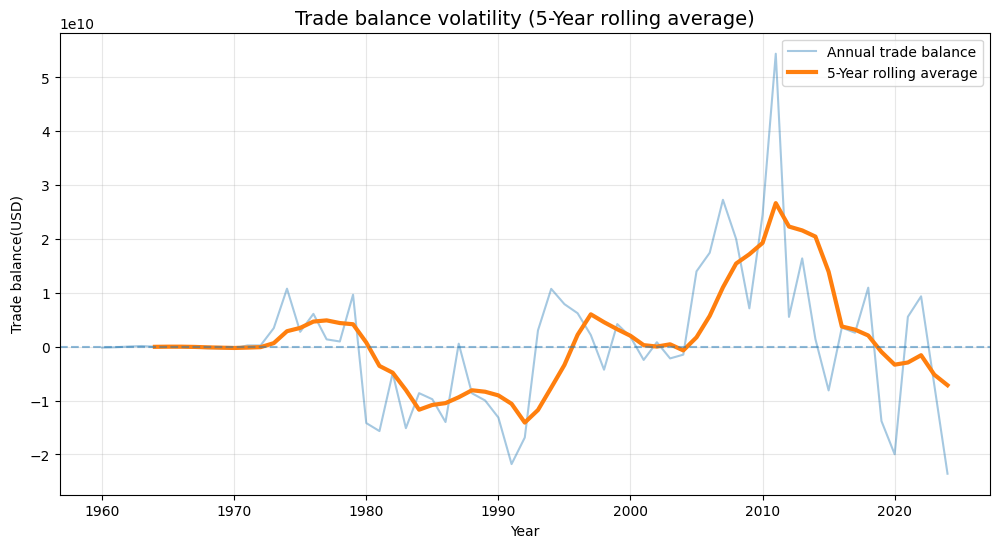

In [51]:
df["Trade_Balance_Rolling_5Y"] =df["Trade_Balance"].rolling(window=5).mean()

plt.figure(figsize=(12,6))
plt.plot(df["Year"],df["Trade_Balance"],alpha=0.4, label="Annual trade balance")
plt.plot(df["Year"],df["Trade_Balance_Rolling_5Y"],linewidth=3,label="5-Year rolling average")

plt.axhline(0,linestyle="--",alpha=0.5)
plt.title("Trade balance volatility (5-Year rolling average)",fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade balance(USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show

We can see that the 5 Year rolling average of trade balance does not show good performance and is still in a range 

<h4>Decade-wise average trade balance</h4>

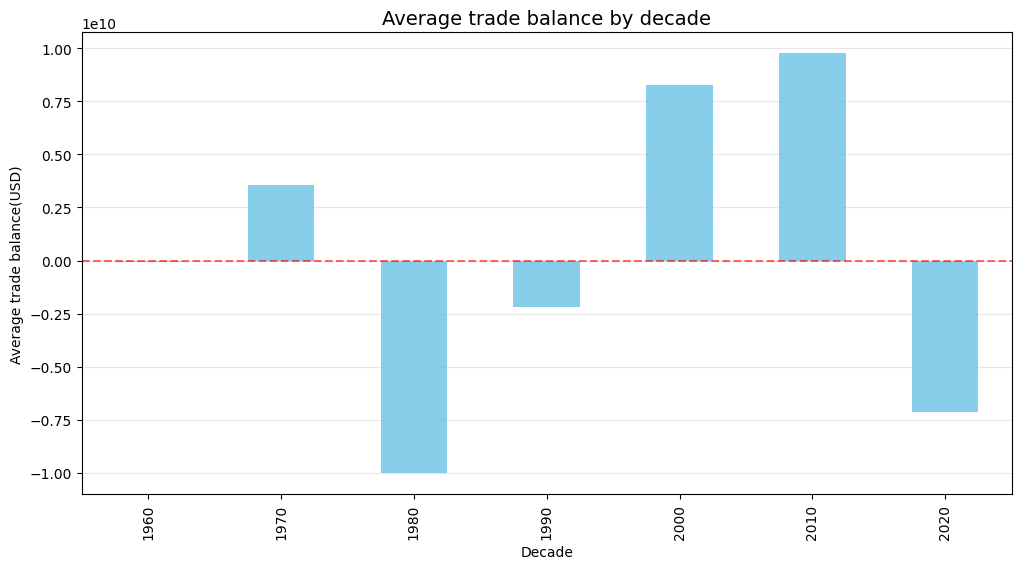

In [52]:
df["Decade"]= (df["Year"]//10)*10

plt.figure(figsize=(12,6))
df.groupby("Decade")["Trade_Balance"].mean().plot(kind="bar",color="skyblue")
plt.axhline(0,linestyle="--",alpha=0.6,color="red")
plt.title("Average trade balance by decade",fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average trade balance(USD)")
plt.grid(axis="y",alpha=0.3)
plt.show()

<h3>Industrial contribution of GDP</h3>

<h4>Industry share of GDP overtime</h4>

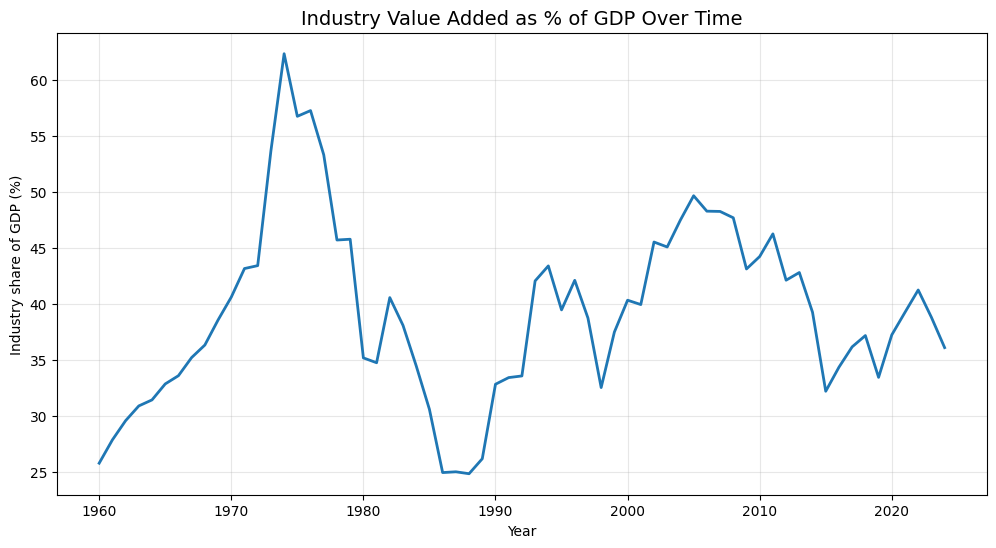

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Industry_Value_Added_Percent_GDP"], linewidth=2)

plt.title("Industry Value Added as % of GDP Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Industry share of GDP (%)")
plt.grid(alpha=0.3)
plt.show()

Industry value as GDP declined more more than 50% after the year 1974-1975 till around 1987 and then again started rising and ranging from 50% to 32% after a small rise 

<h4>Rolling average trend structural analysis</h4>

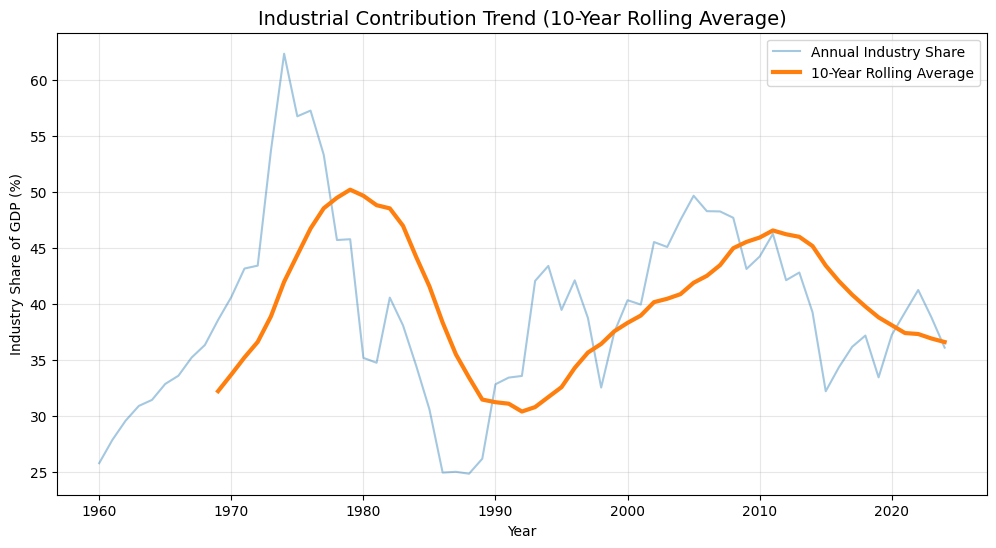

In [54]:
df["Industry_Rolling_10Y"] = df["Industry_Value_Added_Percent_GDP"].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Industry_Value_Added_Percent_GDP"], alpha=0.4, label="Annual Industry Share")
plt.plot(df["Year"], df["Industry_Rolling_10Y"], linewidth=3, label="10-Year Rolling Average")

plt.title("Industrial Contribution Trend (10-Year Rolling Average)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Industry Share of GDP (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The 10 year rolling average also does not show much fluctuation

<h4>Industry share vs GDP growth</h4>

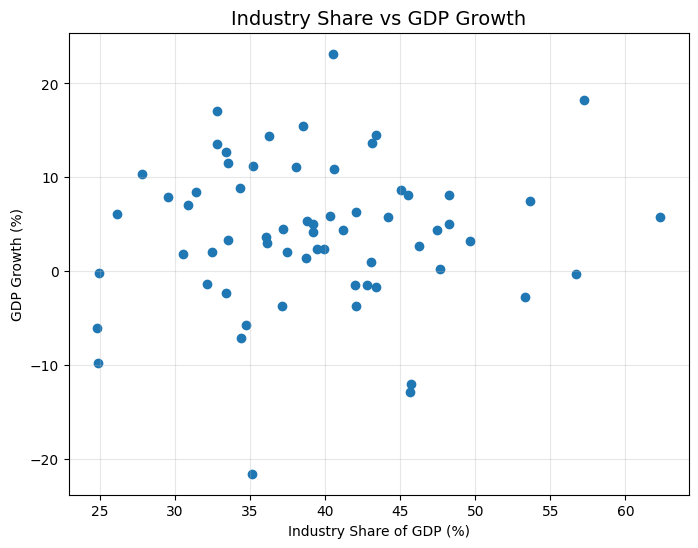

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Industry_Value_Added_Percent_GDP"], df["GDP_Growth_Percent"])
plt.title("Industry Share vs GDP Growth", fontsize=14)
plt.xlabel("Industry Share of GDP (%)")
plt.ylabel("GDP Growth (%)")
plt.grid(alpha=0.3)
plt.show()

<h4>Industry share volatility across decades</h4>

<Figure size 1200x600 with 0 Axes>

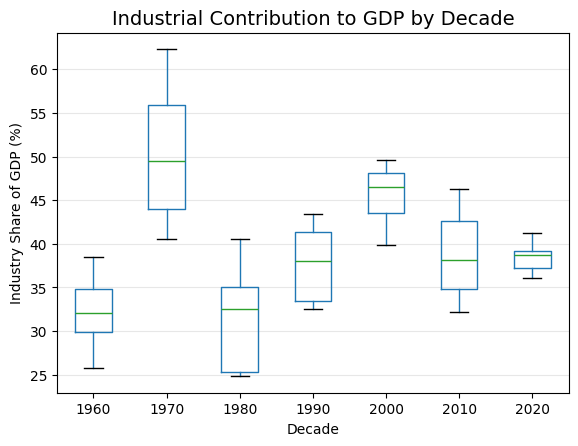

In [56]:
df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
df.boxplot(
    column="Industry_Value_Added_Percent_GDP",
    by="Decade",
    grid=False
)

plt.title("Industrial Contribution to GDP by Decade", fontsize=14)
plt.suptitle("")
plt.xlabel("Decade")
plt.ylabel("Industry Share of GDP (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

<h4>Industry growth vs Economic shock</h4>

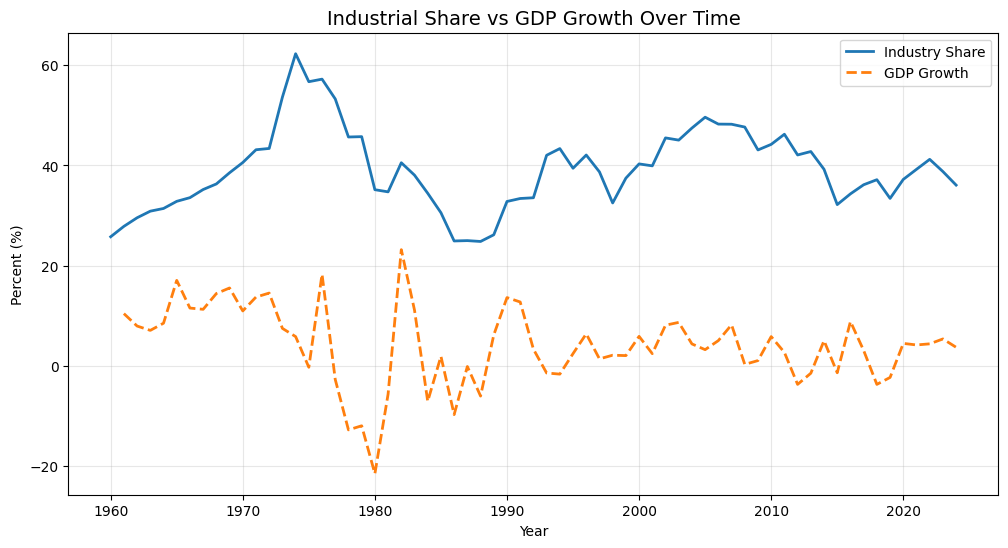

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Industry_Value_Added_Percent_GDP"], linewidth=2, label="Industry Share")
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, linestyle="--", label="GDP Growth")

plt.title("Industrial Share vs GDP Growth Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

whenever there is a economic shock the industry share just declined but still not much affected unline GDP growth which is affected a lot which is obvious if any country undergoes such shock

<h4>Decade wise average industry share</h4>

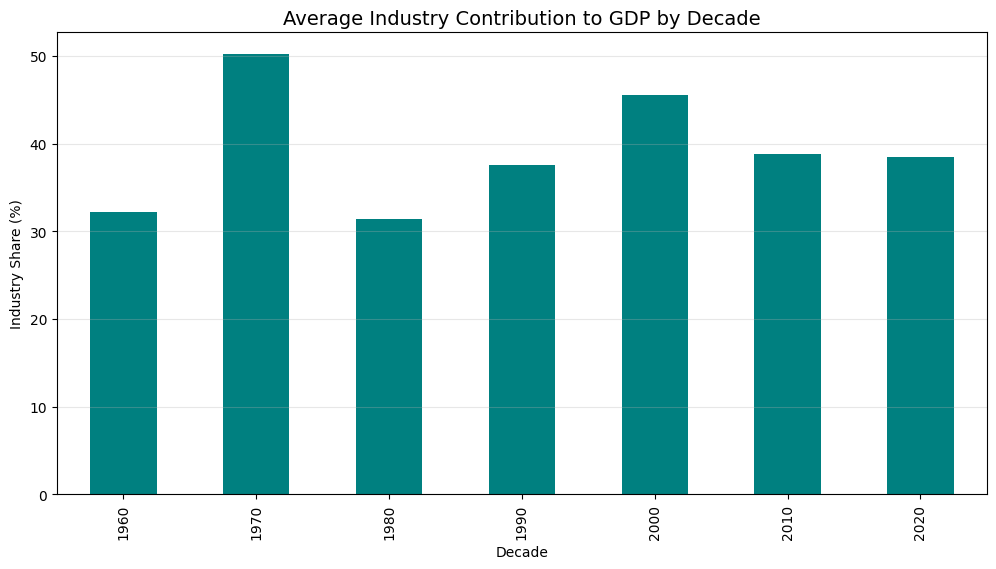

In [58]:
plt.figure(figsize=(12, 6))
df.groupby("Decade")["Industry_Value_Added_Percent_GDP"].mean().plot(kind="bar", color="teal")
plt.title("Average Industry Contribution to GDP by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Industry Share (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

we can see the avg industry contribution to GDP is almost constant throughout decades

<h3>Correlation & Dependency analysis</h3>

<h4>Correlation Heatmap</h4>

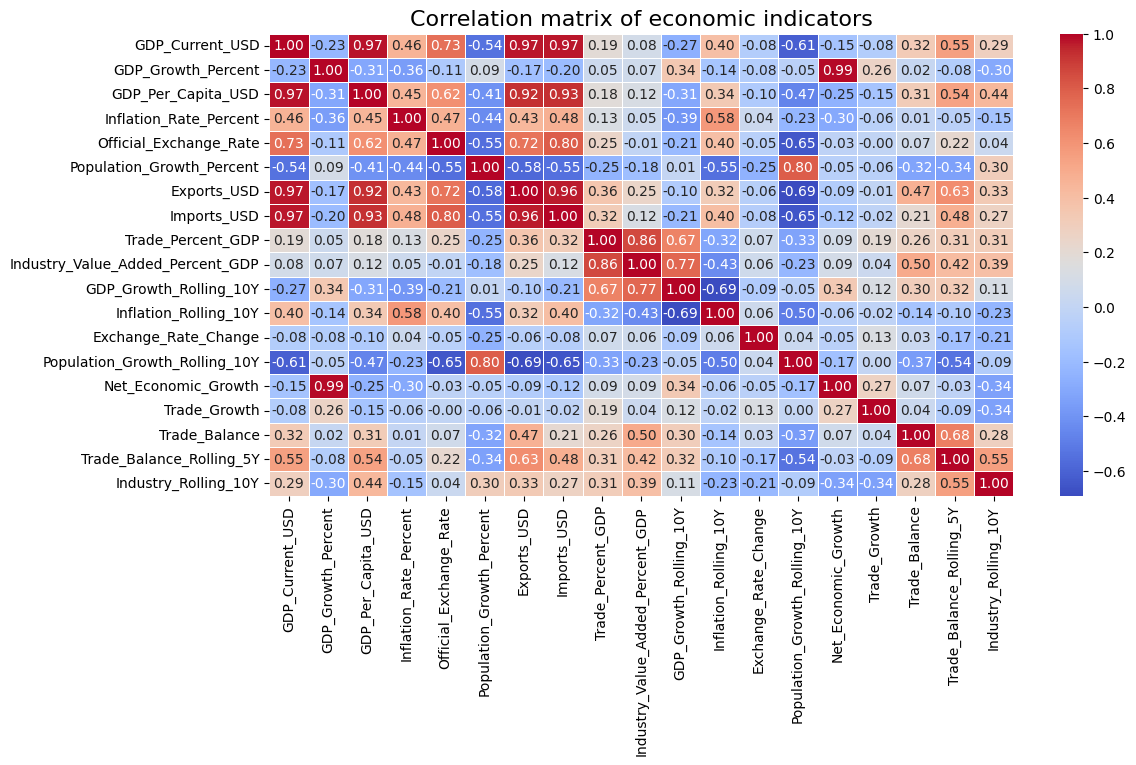

In [59]:
plt.figure(figsize=(12,6))
numeric_cols = df.select_dtypes(include="float64").columns
corr= df[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("Correlation matrix of economic indicators", fontsize=16)
plt.show()

<h4>GDP growth vs Strongest drivers</h4>

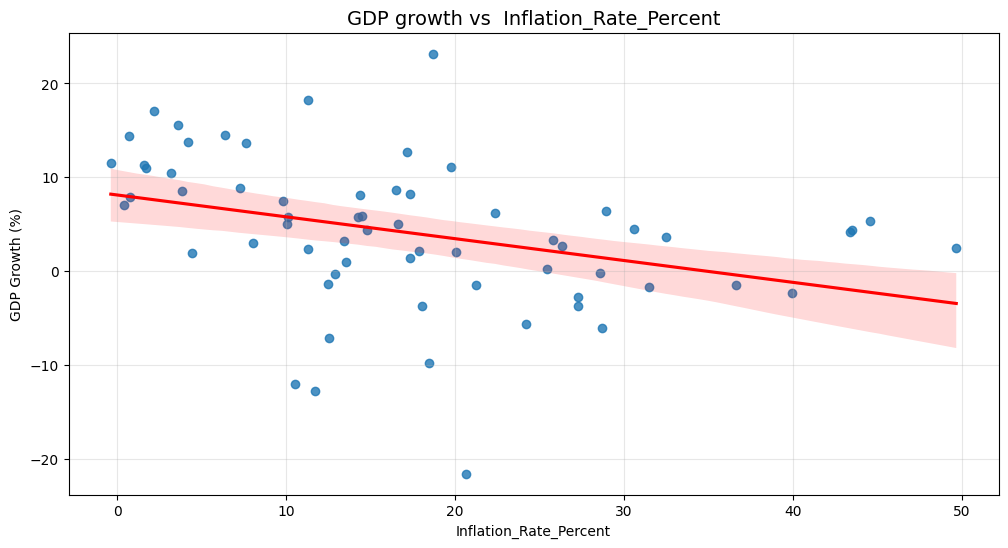

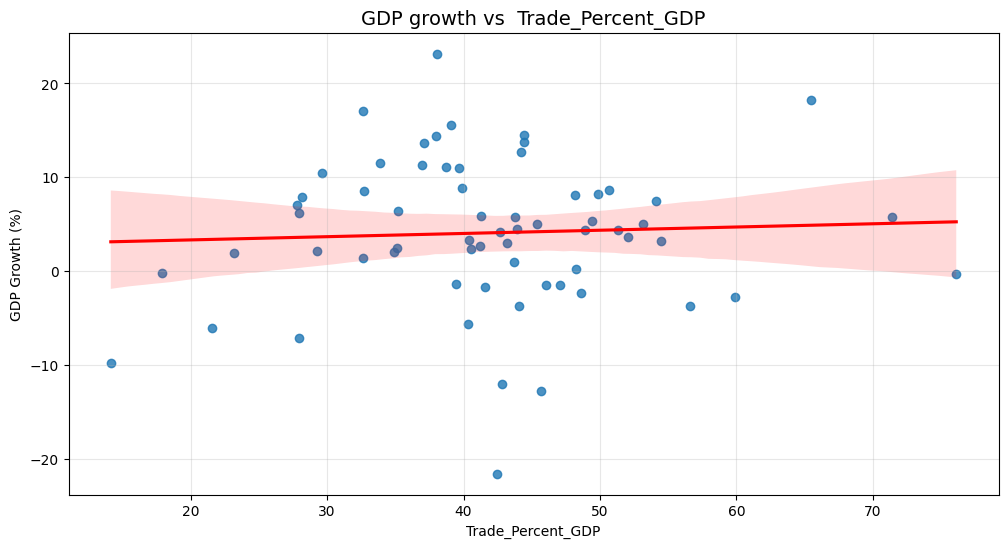

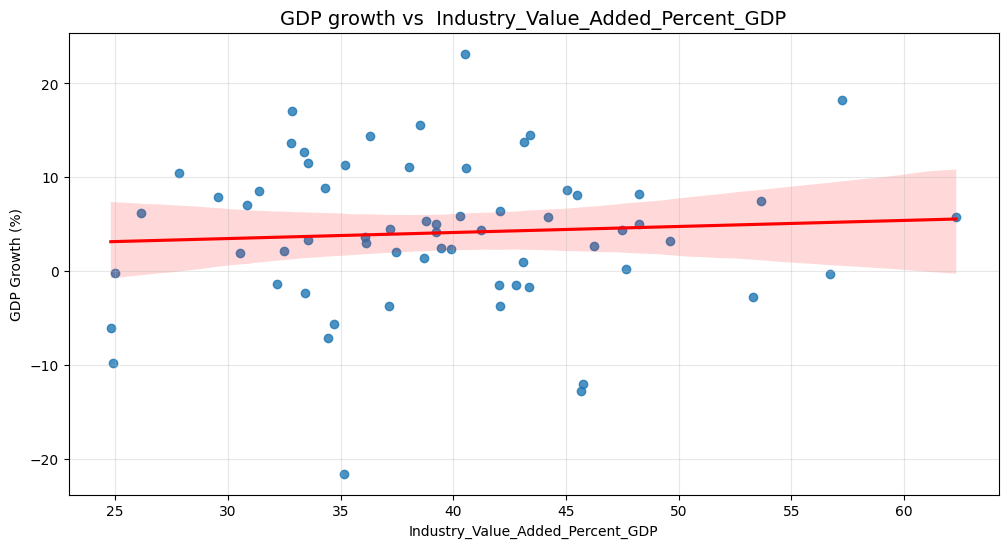

In [60]:
top_drivers = ["Inflation_Rate_Percent", "Trade_Percent_GDP", "Industry_Value_Added_Percent_GDP"]

for col in top_drivers:
    plt.figure(figsize=(12,6))
    sns.regplot(x=df[col], y=df["GDP_Growth_Percent"],line_kws={"color":"red"})
    plt.title(f"GDP growth vs  {col}",fontsize=14)
    plt.xlabel(col)
    plt.ylabel("GDP Growth (%)")
    plt.grid(alpha=0.3)
    plt.show()

we can see top drivers of GDP growth's performance

<h4>Inflation vs Exchange rate correlation</h4>

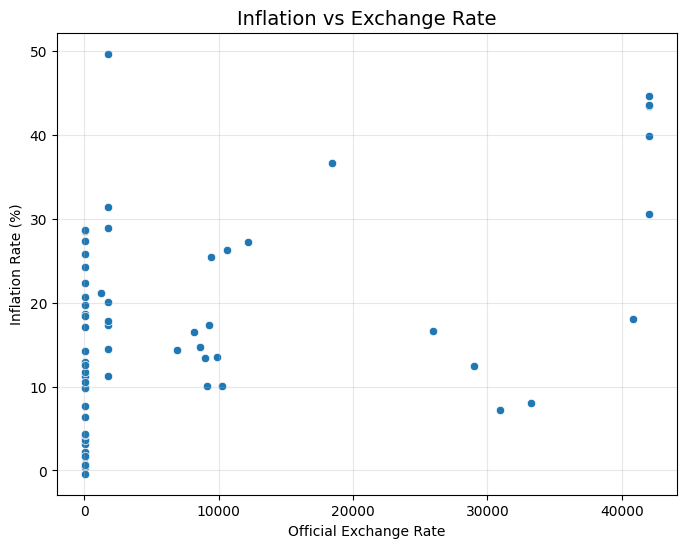

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Official_Exchange_Rate"], y=df["Inflation_Rate_Percent"])
plt.title("Inflation vs Exchange Rate", fontsize=14)
plt.xlabel("Official Exchange Rate")
plt.ylabel("Inflation Rate (%)")
plt.grid(alpha=0.3)
plt.show()

<h4>Trade openness vd Per capita GDP</h4>

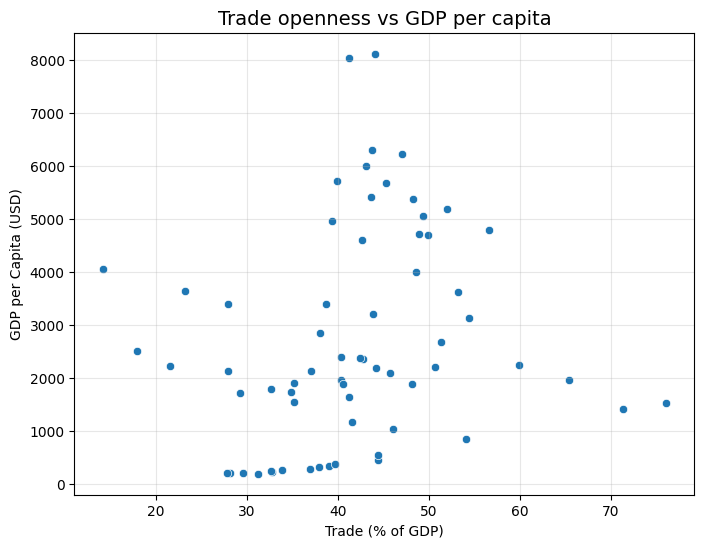

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Trade_Percent_GDP"], y=df["GDP_Per_Capita_USD"])
plt.title("Trade openness vs GDP per capita", fontsize=14)
plt.xlabel("Trade (% of GDP)")
plt.ylabel("GDP per Capita (USD)")
plt.grid(alpha=0.3)
plt.show()

<h4>Pairplot for key Indicators</h4>

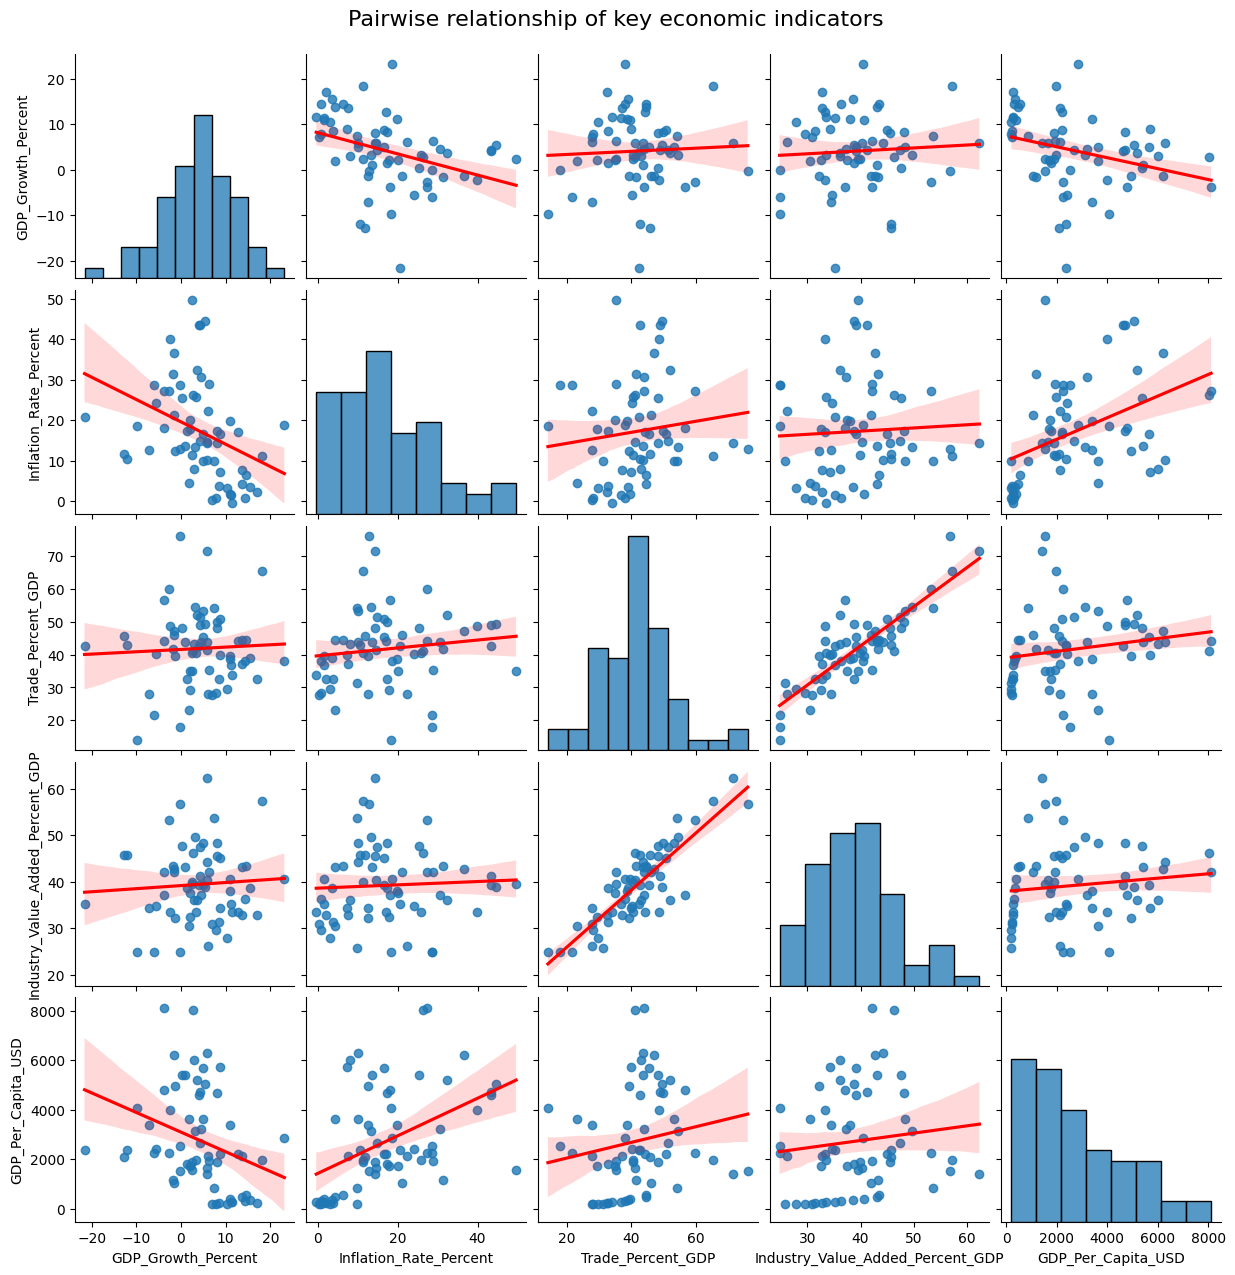

In [66]:
key_cols=["GDP_Growth_Percent","Inflation_Rate_Percent", "Trade_Percent_GDP", 
            "Industry_Value_Added_Percent_GDP", "GDP_Per_Capita_USD"]
sns.pairplot(df[key_cols], kind = "reg", plot_kws={"line_kws":{"color":"red"}})
plt.suptitle("Pairwise relationship of key economic indicators", y=1.02,fontsize=16)
plt.show()

<h4>Multicollinearity check (variance inflation factor)</h4>

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_cols = df.select_dtypes(include =["float64","int64"]).columns

X=df[numeric_cols].drop(columns=["GDP_Growth_Percent"])

X_clean= X.dropna()

vif_data=pd.DataFrame()
vif_data["Features"]= X_clean.columns
vif_data["VIF"]=[variance_inflation_factor(X_clean.values, i) for i in range (X_clean.shape[1])]
vif_data.sort_values(by ="VIF",ascending=False)

,Features,VIF
8,Imports_USD,inf
7,Exports_USD,inf
18,Trade_Balance,inf
12,Decade,1.125900e+15
19,Decad,2.729454e+14
1,GDP_Current_USD,8.948855e+02
2,GDP_Per_Capita_USD,5.304633e+02
5,Population_Total,7.229636e+01
0,Year,4.430395e+01
15,Population_Growth_Rolling_10Y,2.925599e+01


<h3>Volatility & stability analysis</h3>